In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('train_Int_MM_PCA25.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA25.csv')
Test_data = pd.read_csv('test_Int_MM_PCA25.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  PC16          12000 non-null  float64
 16  PC17          12000 non-null  float64
 17  PC18          12000 non-null  float64
 18  PC19          12000 non-nu

In [3]:
Train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,LoanApproved,RiskScore
0,-0.412651,0.084086,0.282528,-0.393400,-0.096727,0.393623,-0.103533,0.098367,-0.313214,-0.013962,...,-0.091701,-0.072858,-0.079062,-0.137487,-0.000524,-0.022516,-0.060531,0.068837,0,0.402174
1,-0.177765,0.031687,0.220899,0.010585,-0.042097,-0.534274,0.271388,0.394490,-0.065320,0.194361,...,-0.071684,-0.103167,-0.103785,0.153628,-0.085276,0.018408,-0.131777,-0.021270,0,0.384058
2,0.075380,-0.140120,-0.233582,0.085041,-0.253663,-0.209136,-0.191891,0.494238,-0.013998,-0.162744,...,-0.103463,-0.177111,-0.164072,-0.008256,0.023895,-0.006031,-0.057943,-0.023823,0,0.438406
3,0.598926,-0.203006,0.054247,-0.085631,0.062238,0.238745,-0.549751,-0.151796,0.010523,0.218145,...,-0.038672,-0.111568,-0.236795,0.071849,0.005840,-0.009029,0.019584,0.092046,1,0.086957
4,0.089788,-0.029256,0.082212,-0.036527,-0.274680,-0.538655,-0.136887,-0.148626,0.186360,-0.124184,...,0.066475,-0.141779,0.117764,0.076732,0.013866,-0.036232,-0.002700,0.038166,0,0.438406


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
print(X_training.shape)

(12000, 26)


Training Losses are 
          0
0  0.601845
1  0.601058
2  0.600283
3  0.599519
4  0.598767
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


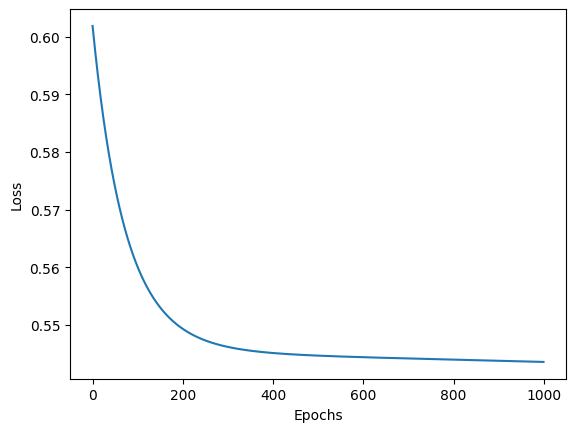

Training Losses are 
          0
0  0.633029
1  0.631143
2  0.629302
3  0.627505
4  0.625749
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


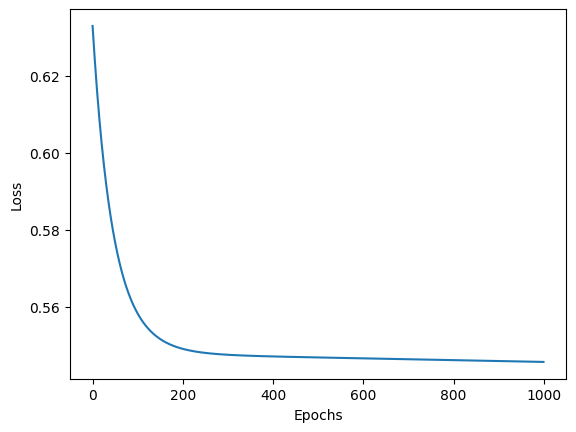

Training Losses are 
          0
0  0.626941
1  0.623801
2  0.620801
3  0.617933
4  0.615192
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


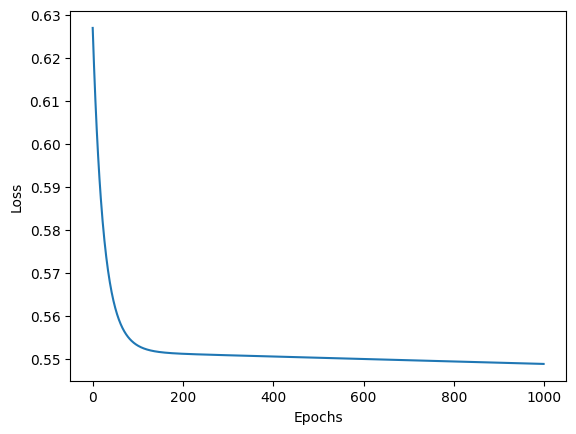

Training Losses are 
          0
0  0.638598
1  0.631941
2  0.625821
3  0.620194
4  0.615017
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


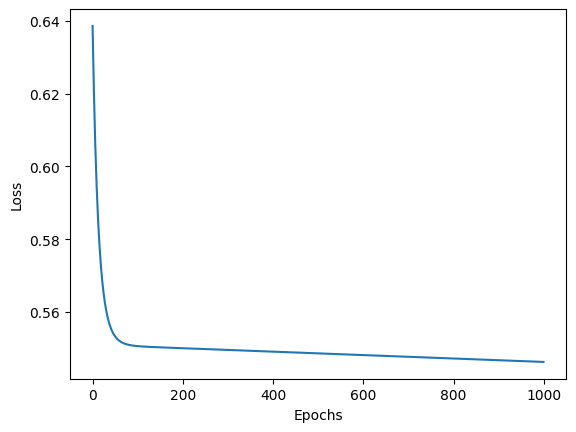

Training Losses are 
          0
0  0.721845
1  0.696301
2  0.674759
3  0.656588
4  0.641252
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


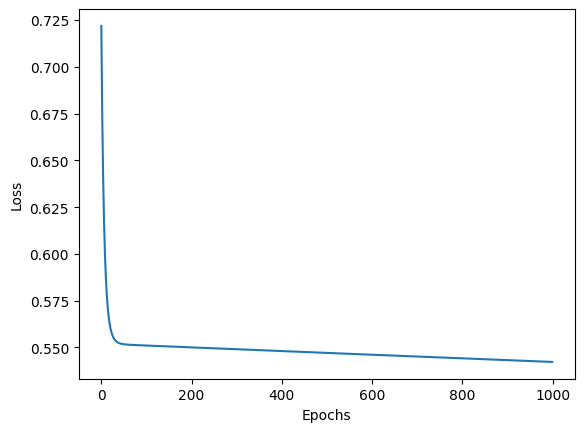

Best accuracy for test data is 0.761 for degree 8


In [15]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(26,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.780119
1  0.778272
2  0.776434
3  0.774605
4  0.772785
Validation Data
Confusion Matrix for hidden layer 8
[[3043    1]
 [ 855  101]]
Accuracy: 0.7860, Precision: 0.9902, Recall: 0.1056, F1-score: 0.1909

Test Data
Confusion Matrix for hiden layer 8
[[3043    1]
 [ 839  117]]
Accuracy: 0.7900, Precision: 0.9915, Recall: 0.1224, F1-score: 0.2179



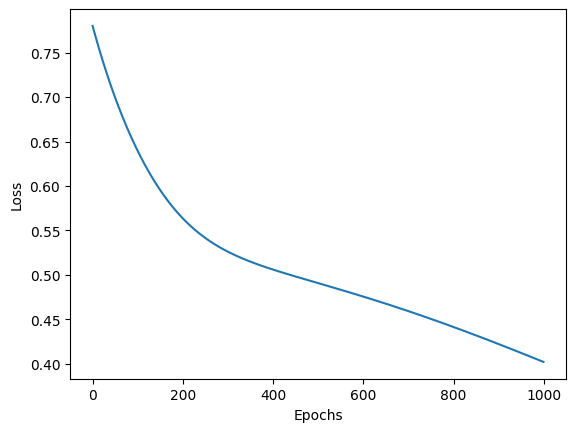

Training Losses are 
          0
0  0.650364
1  0.648181
2  0.646021
3  0.643884
4  0.641772
Validation Data
Confusion Matrix for hidden layer 16
[[3025   19]
 [ 398  558]]
Accuracy: 0.8958, Precision: 0.9671, Recall: 0.5837, F1-score: 0.7280

Test Data
Confusion Matrix for hiden layer 16
[[3026   18]
 [ 403  553]]
Accuracy: 0.8948, Precision: 0.9685, Recall: 0.5785, F1-score: 0.7243



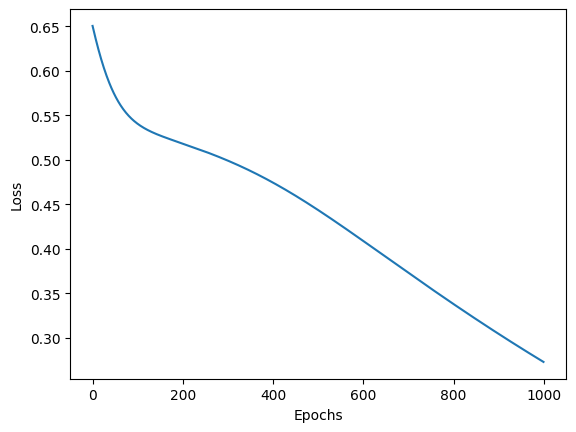

Training Losses are 
          0
0  0.697113
1  0.692271
2  0.687512
3  0.682836
4  0.678246
Validation Data
Confusion Matrix for hidden layer 32
[[3029   15]
 [ 219  737]]
Accuracy: 0.9415, Precision: 0.9801, Recall: 0.7709, F1-score: 0.8630

Test Data
Confusion Matrix for hiden layer 32
[[3031   13]
 [ 225  731]]
Accuracy: 0.9405, Precision: 0.9825, Recall: 0.7646, F1-score: 0.8600



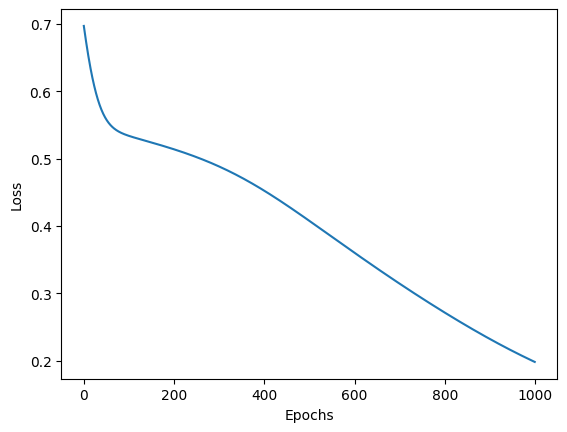

Training Losses are 
          0
0  0.740777
1  0.730341
2  0.720207
3  0.710379
4  0.700864
Validation Data
Confusion Matrix for hidden layer 64
[[3032   12]
 [  97  859]]
Accuracy: 0.9728, Precision: 0.9862, Recall: 0.8985, F1-score: 0.9403

Test Data
Confusion Matrix for hiden layer 64
[[3033   11]
 [  80  876]]
Accuracy: 0.9772, Precision: 0.9876, Recall: 0.9163, F1-score: 0.9506



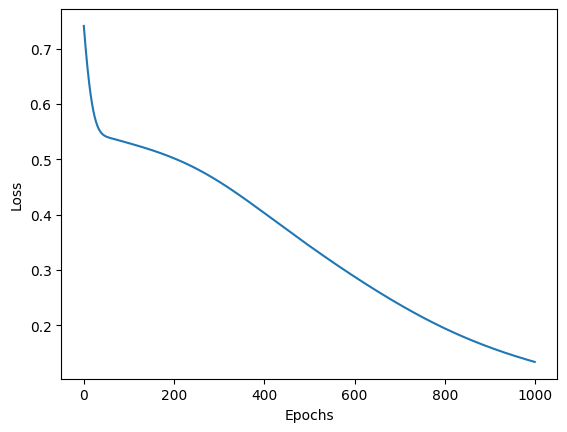

Training Losses are 
          0
0  0.754697
1  0.733957
2  0.714365
3  0.695940
4  0.678699
Validation Data
Confusion Matrix for hidden layer 128
[[3032   12]
 [  39  917]]
Accuracy: 0.9872, Precision: 0.9871, Recall: 0.9592, F1-score: 0.9729

Test Data
Confusion Matrix for hiden layer 128
[[3033   11]
 [  30  926]]
Accuracy: 0.9898, Precision: 0.9883, Recall: 0.9686, F1-score: 0.9783



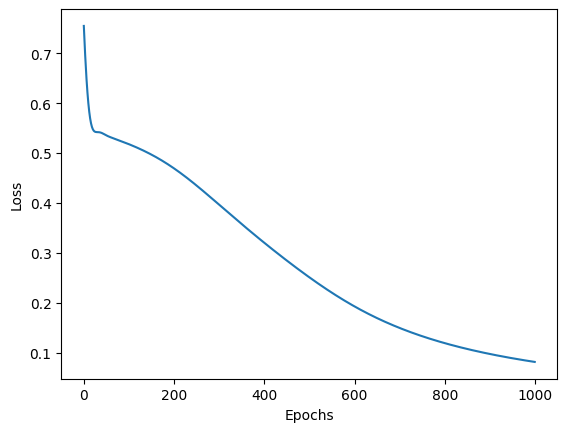

Best accuracy for test data is 0.98975 for degree 128


In [13]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(26,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.597159
1  0.596543
2  0.595935
3  0.595335
4  0.594744
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


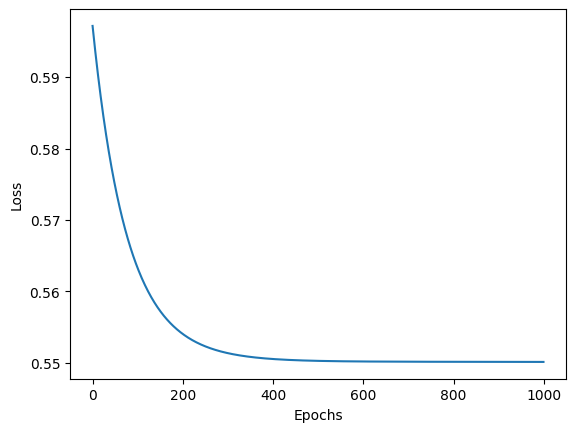

Training Losses are 
          0
0  0.710398
1  0.706239
2  0.702192
3  0.698254
4  0.694424
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


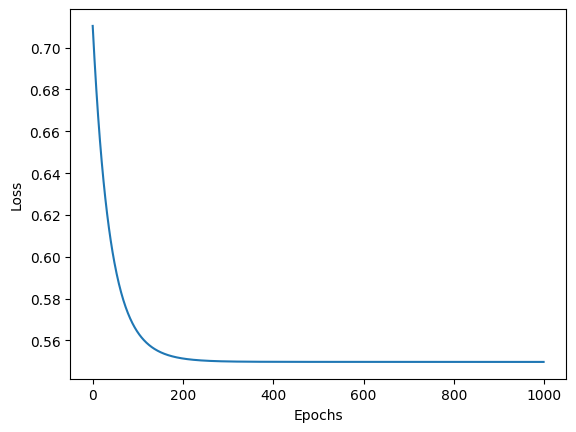

Training Losses are 
          0
0  0.609959
1  0.607538
2  0.605221
3  0.603004
4  0.600881
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


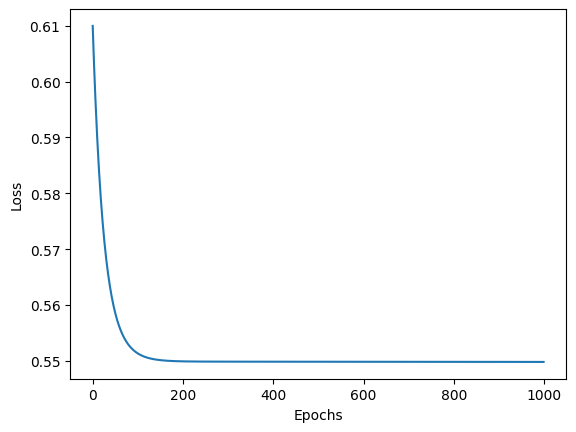

Training Losses are 
          0
0  0.748097
1  0.731322
2  0.716013
3  0.702045
4  0.689303
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


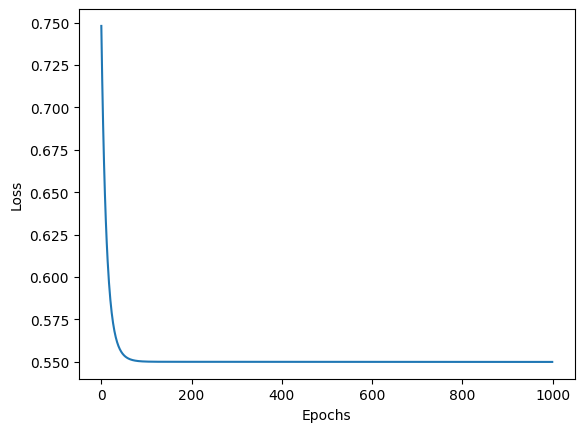

Training Losses are 
          0
0  0.690636
1  0.688670
2  0.686733
3  0.684824
4  0.682943
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


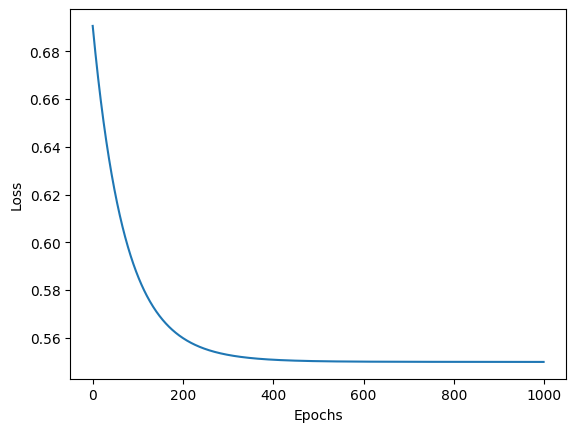

Training Losses are 
          0
0  0.711292
1  0.707045
2  0.702915
3  0.698898
4  0.694990
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


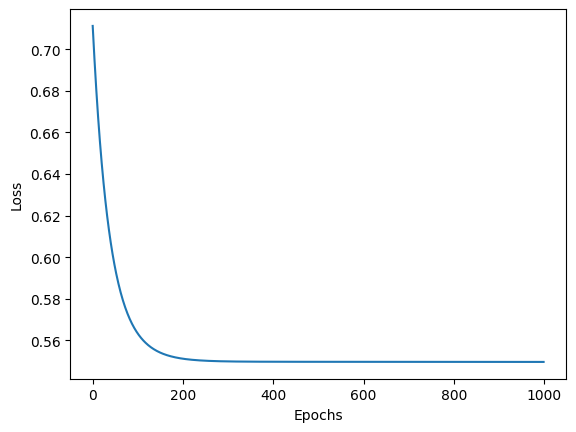

Training Losses are 
          0
0  0.773830
1  0.763426
2  0.753516
3  0.744079
4  0.735092
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


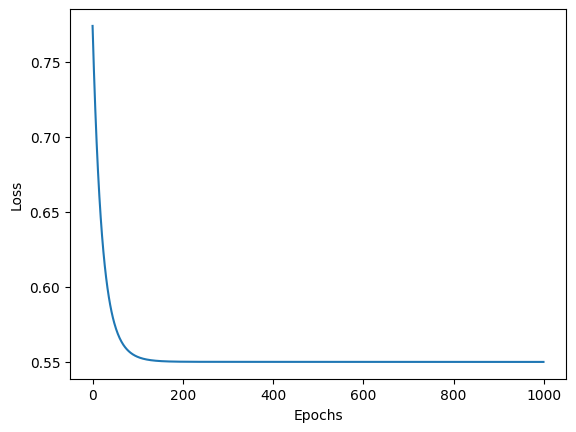

Training Losses are 
          0
0  0.635846
1  0.629308
2  0.623296
3  0.617768
4  0.612681
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


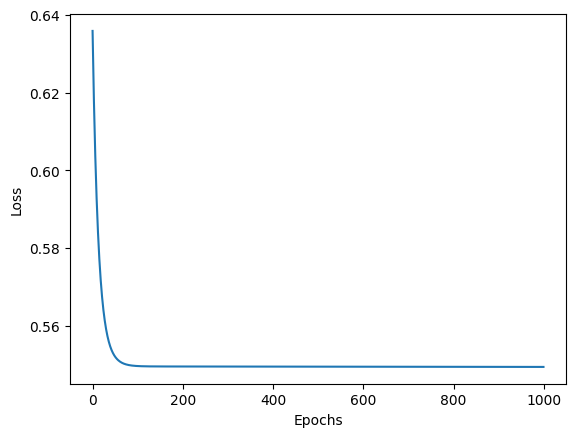

Training Losses are 
          0
0  0.757932
1  0.754858
2  0.751832
3  0.748851
4  0.745917
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


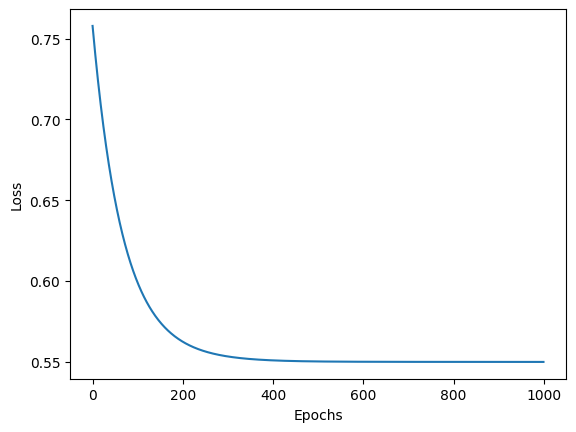

Training Losses are 
          0
0  0.595280
1  0.594220
2  0.593186
3  0.592178
4  0.591195
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


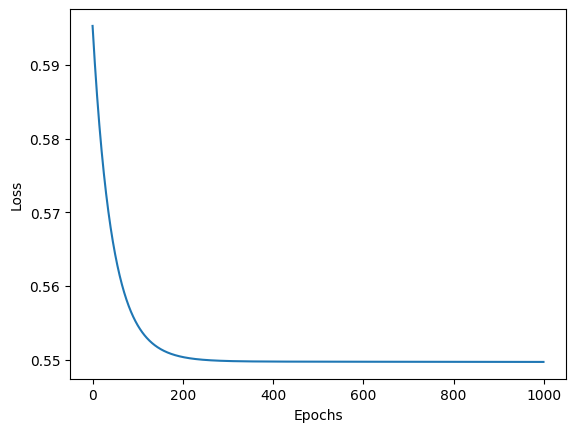

Training Losses are 
          0
0  0.706959
1  0.700366
2  0.694063
3  0.688037
4  0.682276
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


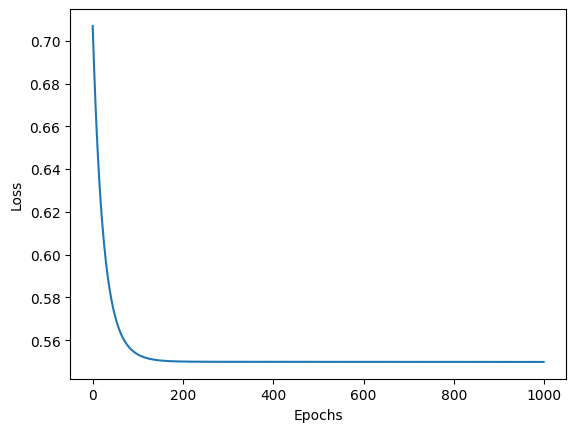

Training Losses are 
          0
0  0.754601
1  0.737461
2  0.721800
3  0.707497
4  0.694435
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


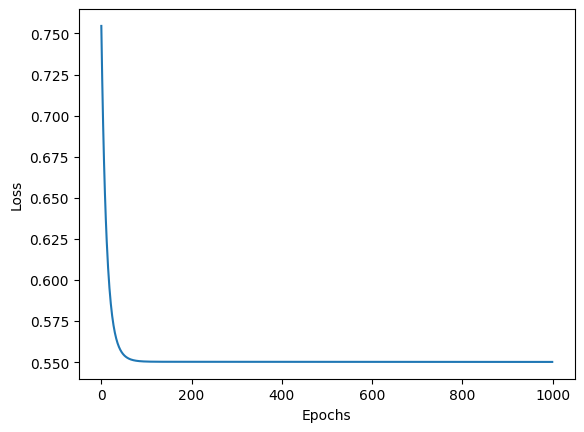

Training Losses are 
          0
0  0.699228
1  0.697050
2  0.694906
3  0.692794
4  0.690716
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


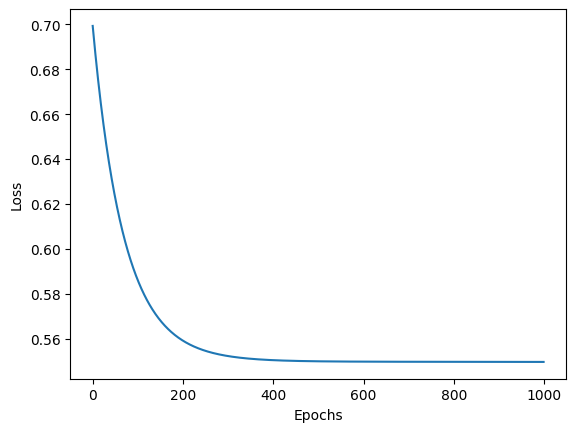

Training Losses are 
          0
0  0.802740
1  0.796408
2  0.790242
3  0.784237
4  0.778390
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


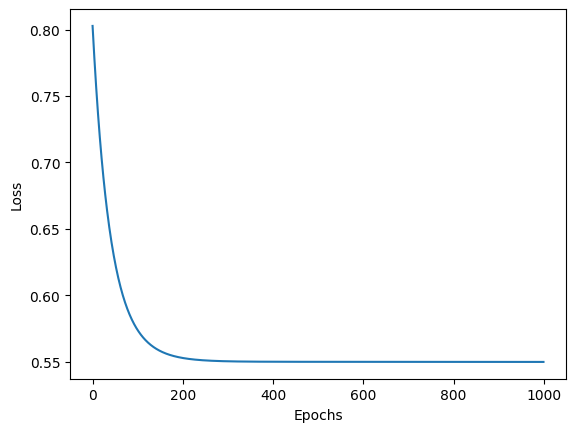

Training Losses are 
          0
0  0.712902
1  0.705368
2  0.698196
3  0.691370
4  0.684873
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


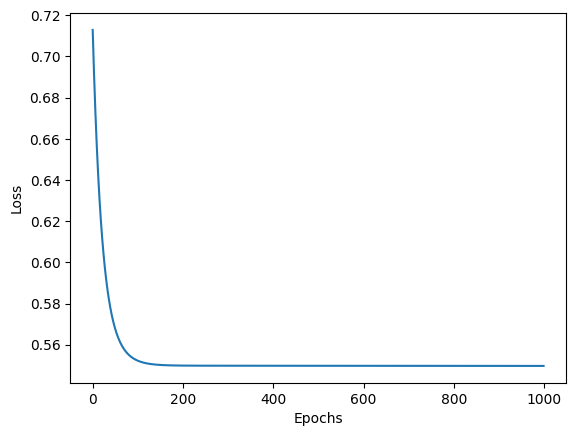

Training Losses are 
          0
0  0.688715
1  0.677484
2  0.667209
3  0.657807
4  0.649202
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


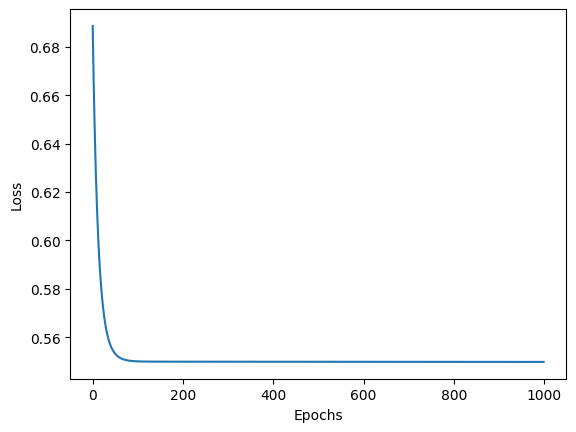

Best accuracy for test data is 0.761 for degree 8 & 8


In [15]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
layer_xyz=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(26,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
        layer_xyz=double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3} & {layer_xyz}")

Training Losses are 
          0
0  0.673739
1  0.672197
2  0.670666
3  0.669147
4  0.667639
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


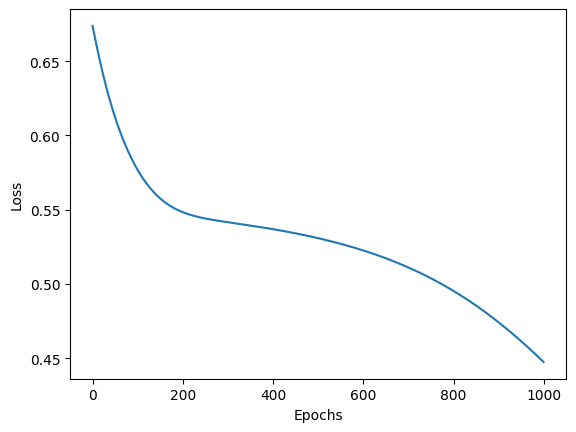

Training Losses are 
          0
0  0.883227
1  0.878847
2  0.874503
3  0.870195
4  0.865925
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 954    2]]
Accuracy: 0.7615, Precision: 1.0000, Recall: 0.0021, F1-score: 0.0042



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


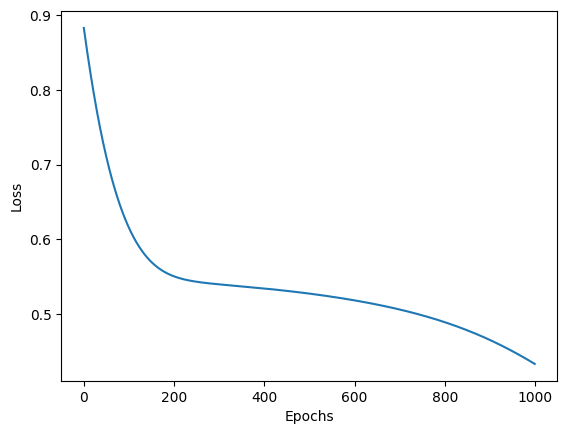

Training Losses are 
          0
0  0.562644
1  0.561228
2  0.559901
3  0.558665
4  0.557519
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3034   10]
 [  16  940]]
Accuracy: 0.9935, Precision: 0.9895, Recall: 0.9833, F1-score: 0.9864

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3032   12]
 [  12  944]]
Accuracy: 0.9940, Precision: 0.9874, Recall: 0.9874, F1-score: 0.9874



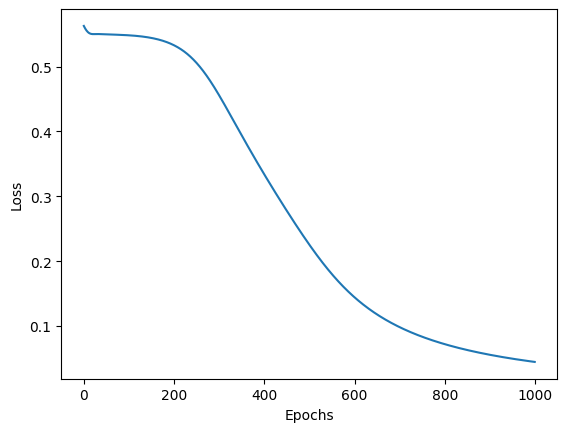

Training Losses are 
          0
0  0.736138
1  0.725012
2  0.714258
3  0.703884
4  0.693892
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3031   13]
 [  42  914]]
Accuracy: 0.9862, Precision: 0.9860, Recall: 0.9561, F1-score: 0.9708

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3031   13]
 [  31  925]]
Accuracy: 0.9890, Precision: 0.9861, Recall: 0.9676, F1-score: 0.9768



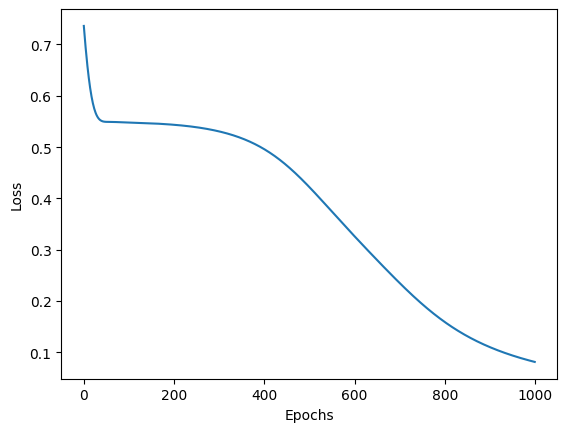

Training Losses are 
          0
0  0.668703
1  0.666603
2  0.664523
3  0.662463
4  0.660424
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3024   20]
 [ 337  619]]
Accuracy: 0.9107, Precision: 0.9687, Recall: 0.6475, F1-score: 0.7762

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3026   18]
 [ 338  618]]
Accuracy: 0.9110, Precision: 0.9717, Recall: 0.6464, F1-score: 0.7764



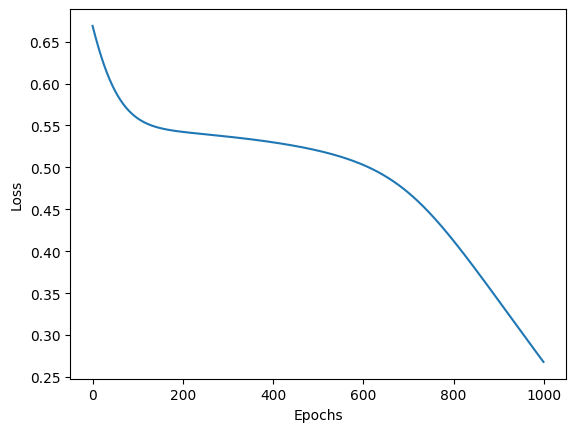

Training Losses are 
          0
0  0.614448
1  0.612337
2  0.610259
3  0.608214
4  0.606203
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3033   11]
 [  41  915]]
Accuracy: 0.9870, Precision: 0.9881, Recall: 0.9571, F1-score: 0.9724

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3034   10]
 [  32  924]]
Accuracy: 0.9895, Precision: 0.9893, Recall: 0.9665, F1-score: 0.9778



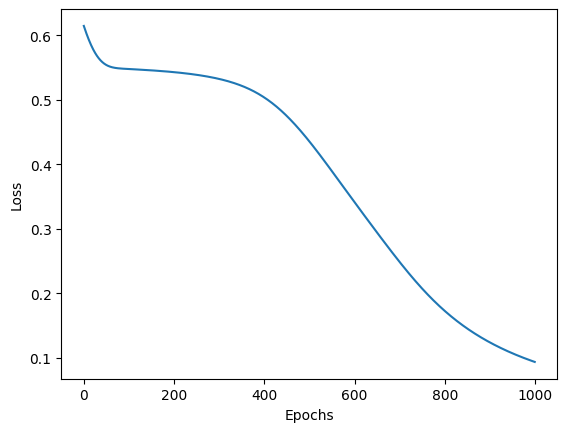

Training Losses are 
          0
0  0.645787
1  0.640699
2  0.635766
3  0.630989
4  0.626369
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3033   11]
 [  24  932]]
Accuracy: 0.9912, Precision: 0.9883, Recall: 0.9749, F1-score: 0.9816

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3031   13]
 [  17  939]]
Accuracy: 0.9925, Precision: 0.9863, Recall: 0.9822, F1-score: 0.9843



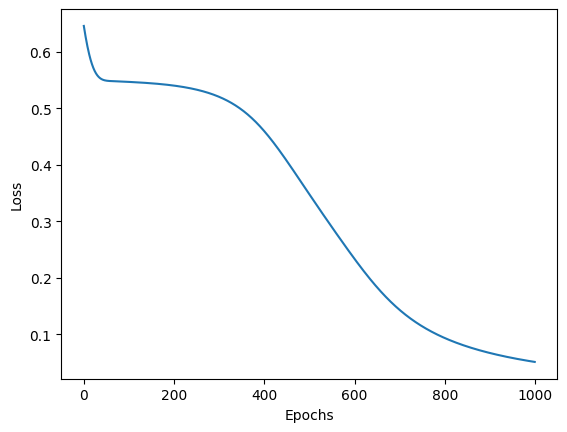

Training Losses are 
          0
0  0.663288
1  0.653902
2  0.644953
3  0.636448
4  0.628390
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3033   11]
 [  15  941]]
Accuracy: 0.9935, Precision: 0.9884, Recall: 0.9843, F1-score: 0.9864

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3032   12]
 [  13  943]]
Accuracy: 0.9938, Precision: 0.9874, Recall: 0.9864, F1-score: 0.9869



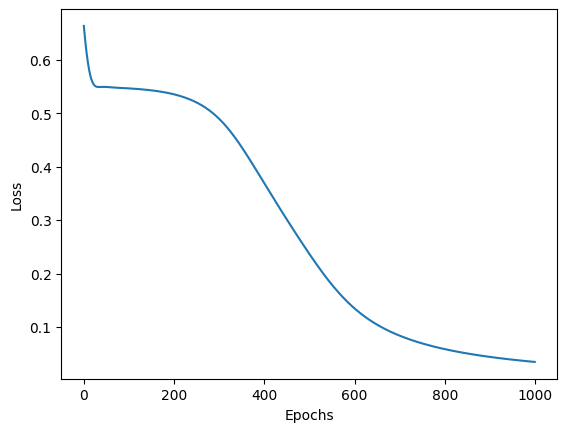

Training Losses are 
          0
0  0.633718
1  0.631741
2  0.629796
3  0.627884
4  0.626004
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3031   13]
 [  41  915]]
Accuracy: 0.9865, Precision: 0.9860, Recall: 0.9571, F1-score: 0.9713

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3031   13]
 [  32  924]]
Accuracy: 0.9888, Precision: 0.9861, Recall: 0.9665, F1-score: 0.9762



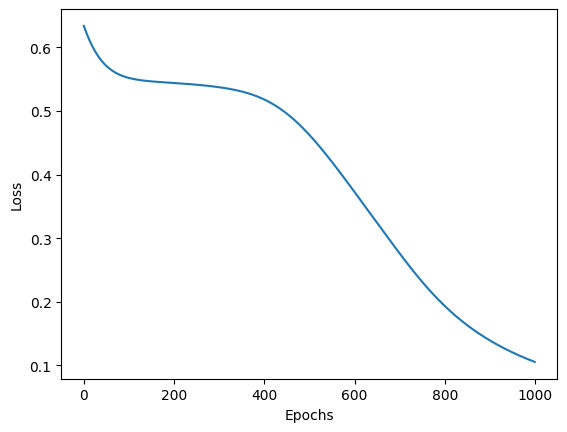

Training Losses are 
          0
0  0.699598
1  0.694560
2  0.689616
3  0.684763
4  0.680005
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3030   14]
 [  38  918]]
Accuracy: 0.9870, Precision: 0.9850, Recall: 0.9603, F1-score: 0.9725

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3030   14]
 [  29  927]]
Accuracy: 0.9892, Precision: 0.9851, Recall: 0.9697, F1-score: 0.9773



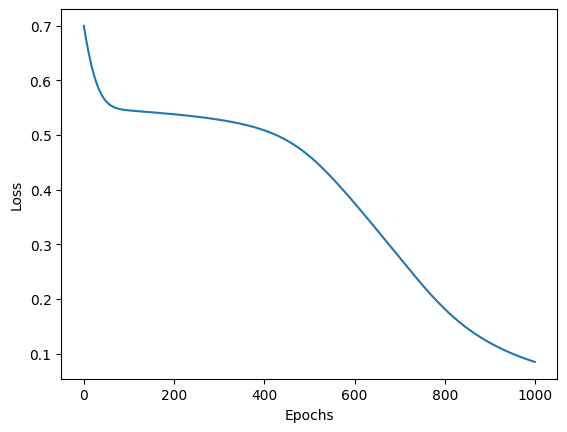

Training Losses are 
          0
0  0.710637
1  0.702882
2  0.695332
3  0.687992
4  0.680864
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3032   12]
 [  24  932]]
Accuracy: 0.9910, Precision: 0.9873, Recall: 0.9749, F1-score: 0.9811

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3031   13]
 [  16  940]]
Accuracy: 0.9928, Precision: 0.9864, Recall: 0.9833, F1-score: 0.9848



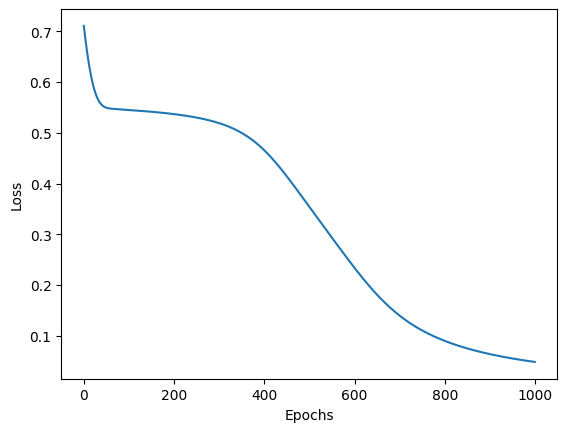

Training Losses are 
          0
0  0.679093
1  0.667125
2  0.655776
3  0.645056
4  0.634971
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3037    7]
 [  12  944]]
Accuracy: 0.9952, Precision: 0.9926, Recall: 0.9874, F1-score: 0.9900

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3032   12]
 [   9  947]]
Accuracy: 0.9948, Precision: 0.9875, Recall: 0.9906, F1-score: 0.9890



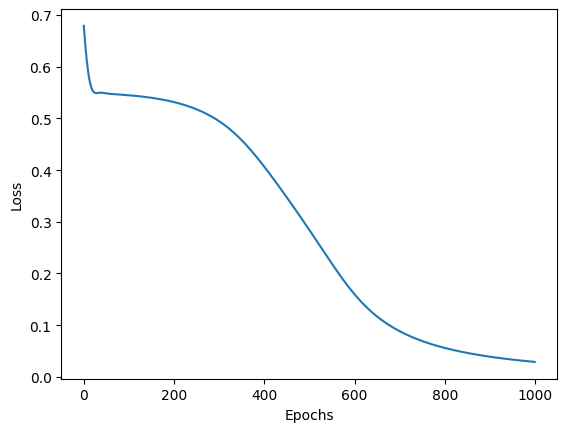

Training Losses are 
          0
0  0.734112
1  0.729807
2  0.725575
3  0.721418
4  0.717337
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3031   13]
 [  49  907]]
Accuracy: 0.9845, Precision: 0.9859, Recall: 0.9487, F1-score: 0.9670

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3031   13]
 [  36  920]]
Accuracy: 0.9878, Precision: 0.9861, Recall: 0.9623, F1-score: 0.9741



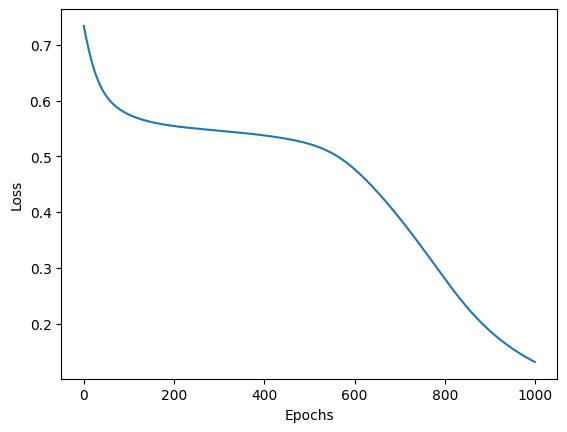

Training Losses are 
          0
0  0.775657
1  0.767602
2  0.759722
3  0.752024
4  0.744511
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3033   11]
 [  30  926]]
Accuracy: 0.9898, Precision: 0.9883, Recall: 0.9686, F1-score: 0.9783

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3032   12]
 [  21  935]]
Accuracy: 0.9918, Precision: 0.9873, Recall: 0.9780, F1-score: 0.9827



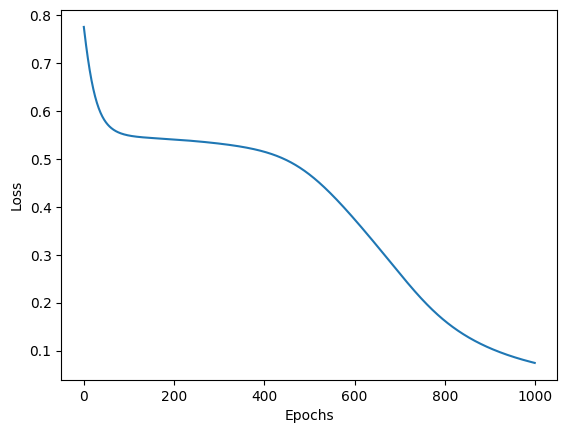

Training Losses are 
          0
0  0.697064
1  0.686944
2  0.677214
3  0.667881
4  0.658950
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3036    8]
 [  11  945]]
Accuracy: 0.9952, Precision: 0.9916, Recall: 0.9885, F1-score: 0.9900

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3034   10]
 [   9  947]]
Accuracy: 0.9952, Precision: 0.9896, Recall: 0.9906, F1-score: 0.9901



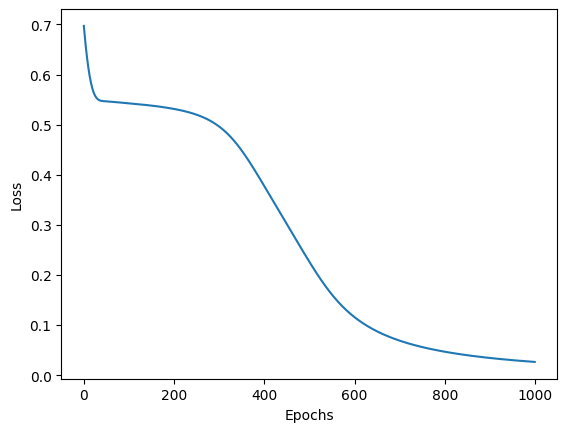

Training Losses are 
          0
0  0.745328
1  0.725288
2  0.706424
3  0.688753
4  0.672284
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3039    5]
 [   8  948]]
Accuracy: 0.9968, Precision: 0.9948, Recall: 0.9916, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



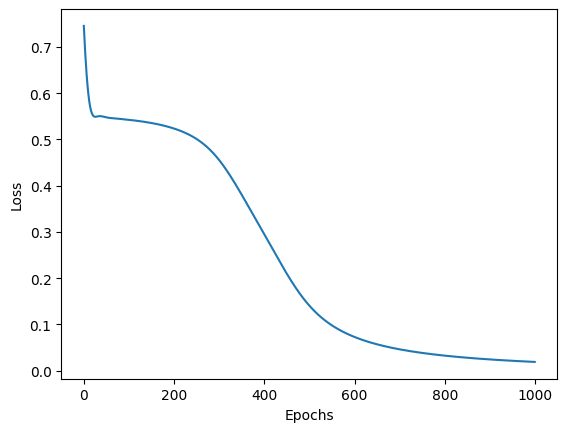

Best accuracy for test data is 0.99675 for degree 64 & 64


In [16]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(26,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [17]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.588006
1  0.587139
2  0.586281
3  0.585434
4  0.584597
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3040    4]
 [ 339  617]]
Accuracy: 0.9143, Precision: 0.9936, Recall: 0.6454, F1-score: 0.7825

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3041    3]
 [ 332  624]]
Accuracy: 0.9163, Precision: 0.9952, Recall: 0.6527, F1-score: 0.7884



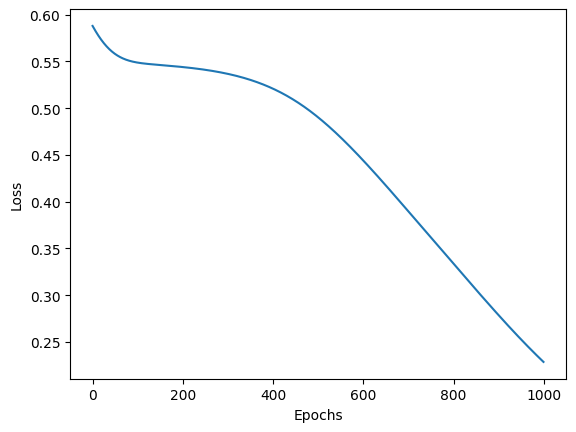

Training Losses are 
          0
0  0.667870
1  0.666330
2  0.664802
3  0.663286
4  0.661780
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3042    2]
 [ 725  231]]
Accuracy: 0.8183, Precision: 0.9914, Recall: 0.2416, F1-score: 0.3886

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3043    1]
 [ 724  232]]
Accuracy: 0.8187, Precision: 0.9957, Recall: 0.2427, F1-score: 0.3902



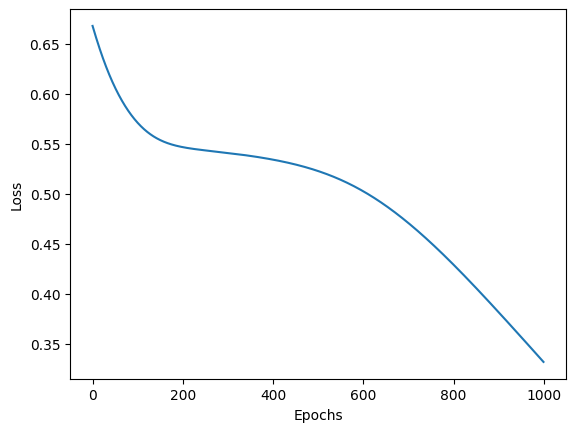

Training Losses are 
          0
0  0.747335
1  0.745265
2  0.743210
3  0.741170
4  0.739145
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


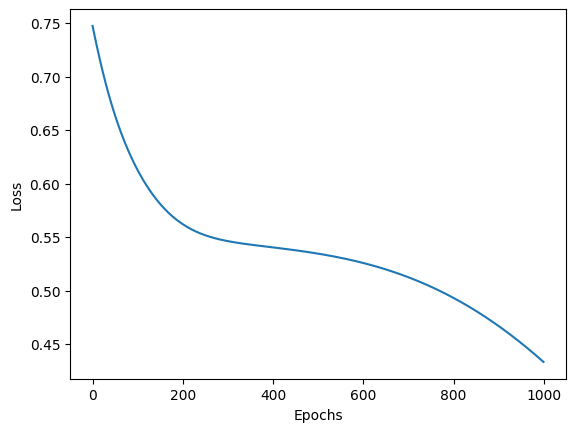

Training Losses are 
          0
0  0.728334
1  0.726403
2  0.724485
3  0.722580
4  0.720687
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


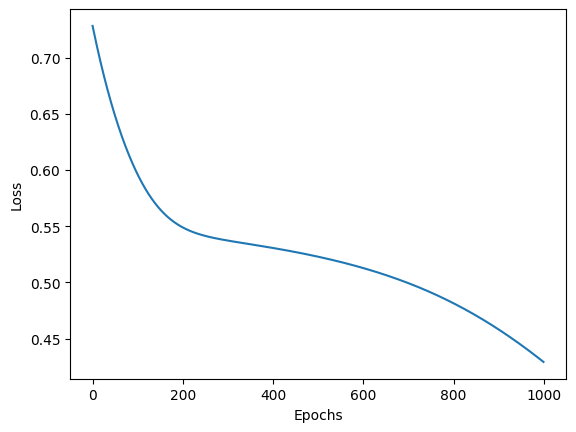

Training Losses are 
          0
0  0.728594
1  0.725305
2  0.722050
3  0.718830
4  0.715644
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3019   25]
 [ 355  601]]
Accuracy: 0.9050, Precision: 0.9601, Recall: 0.6287, F1-score: 0.7598

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3019   25]
 [ 352  604]]
Accuracy: 0.9058, Precision: 0.9603, Recall: 0.6318, F1-score: 0.7621



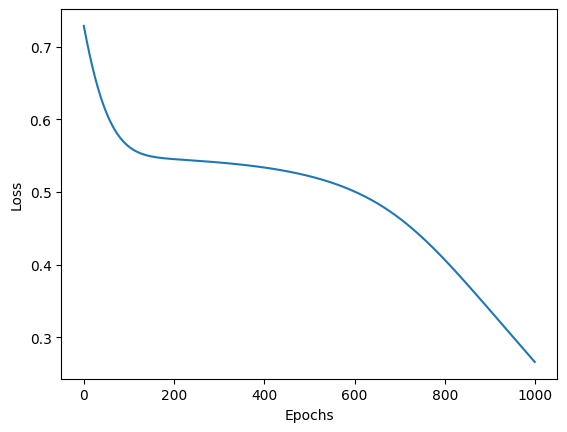

Training Losses are 
          0
0  0.627866
1  0.625794
2  0.623749
3  0.621734
4  0.619747
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3030   14]
 [ 102  854]]
Accuracy: 0.9710, Precision: 0.9839, Recall: 0.8933, F1-score: 0.9364

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3032   12]
 [  94  862]]
Accuracy: 0.9735, Precision: 0.9863, Recall: 0.9017, F1-score: 0.9421



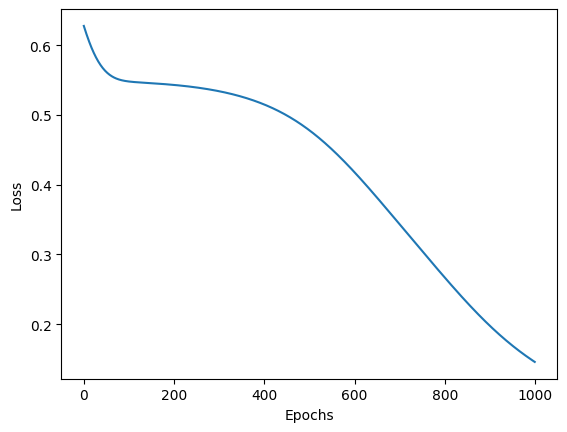

Training Losses are 
          0
0  0.846126
1  0.842121
2  0.838151
3  0.834216
4  0.830318
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 953    3]]
Accuracy: 0.7618, Precision: 1.0000, Recall: 0.0031, F1-score: 0.0063

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 952    4]]
Accuracy: 0.7620, Precision: 1.0000, Recall: 0.0042, F1-score: 0.0083



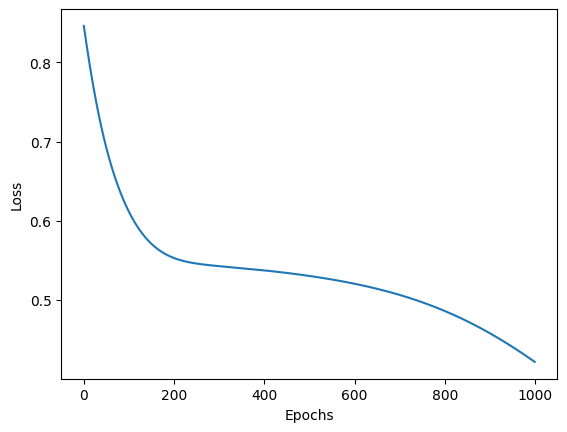

Training Losses are 
          0
0  0.759981
1  0.756411
2  0.752879
3  0.749385
4  0.745930
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3027   17]
 [ 437  519]]
Accuracy: 0.8865, Precision: 0.9683, Recall: 0.5429, F1-score: 0.6957

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3029   15]
 [ 419  537]]
Accuracy: 0.8915, Precision: 0.9728, Recall: 0.5617, F1-score: 0.7122



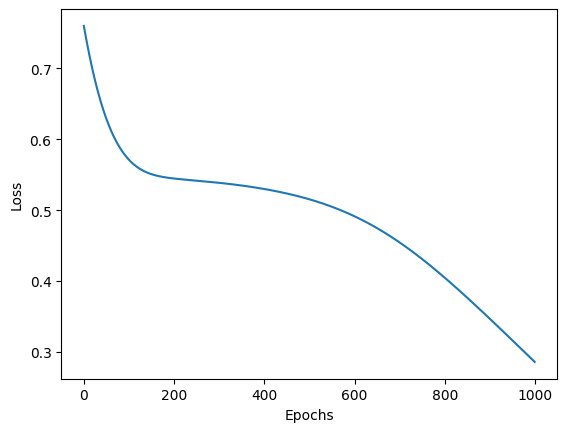

Training Losses are 
          0
0  0.646806
1  0.642739
2  0.638768
3  0.634894
4  0.631117
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3031   13]
 [  50  906]]
Accuracy: 0.9842, Precision: 0.9859, Recall: 0.9477, F1-score: 0.9664

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3032   12]
 [  37  919]]
Accuracy: 0.9878, Precision: 0.9871, Recall: 0.9613, F1-score: 0.9740



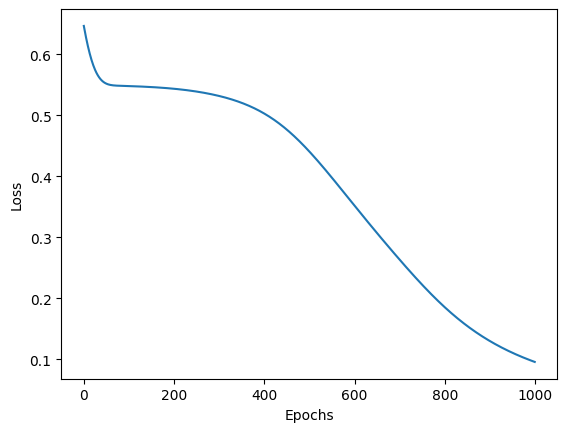

Training Losses are 
          0
0  0.570231
1  0.568364
2  0.566591
3  0.564913
4  0.563332
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3031   13]
 [  24  932]]
Accuracy: 0.9908, Precision: 0.9862, Recall: 0.9749, F1-score: 0.9805

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3030   14]
 [  16  940]]
Accuracy: 0.9925, Precision: 0.9853, Recall: 0.9833, F1-score: 0.9843



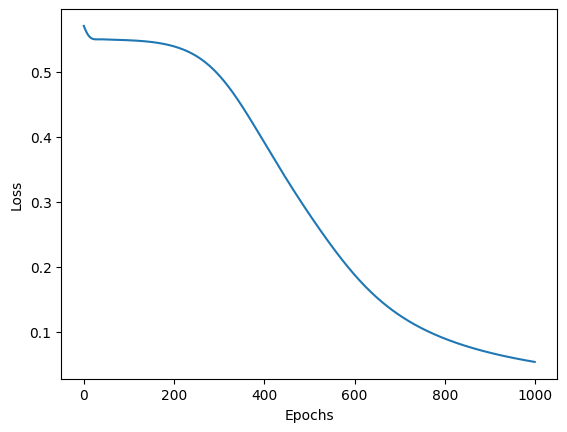

Training Losses are 
          0
0  0.748284
1  0.742354
2  0.736521
3  0.730787
4  0.725152
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3032   12]
 [  66  890]]
Accuracy: 0.9805, Precision: 0.9867, Recall: 0.9310, F1-score: 0.9580

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3034   10]
 [  52  904]]
Accuracy: 0.9845, Precision: 0.9891, Recall: 0.9456, F1-score: 0.9668



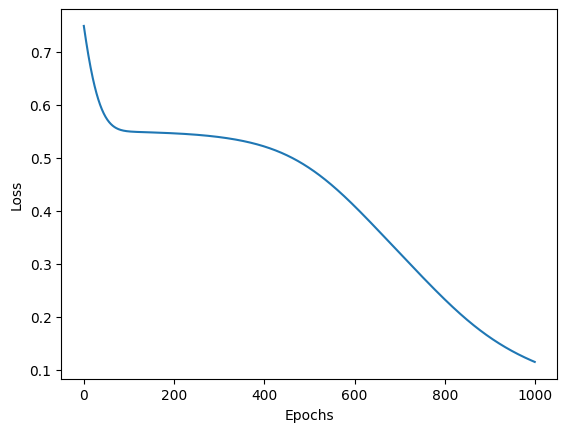

Training Losses are 
          0
0  0.637340
1  0.633141
2  0.629049
3  0.625069
4  0.621199
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3031   13]
 [  61  895]]
Accuracy: 0.9815, Precision: 0.9857, Recall: 0.9362, F1-score: 0.9603

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3032   12]
 [  47  909]]
Accuracy: 0.9852, Precision: 0.9870, Recall: 0.9508, F1-score: 0.9686



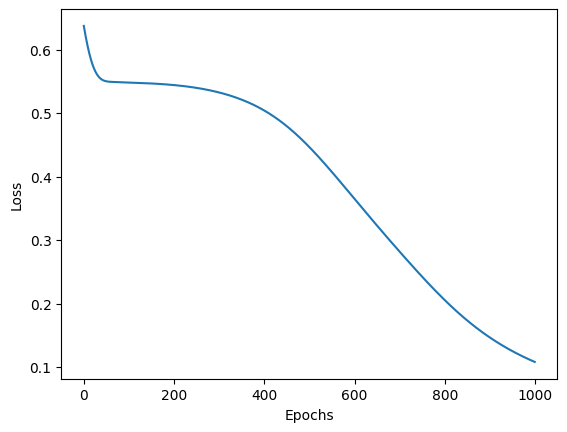

Training Losses are 
          0
0  0.821296
1  0.807519
2  0.794115
3  0.781090
4  0.768450
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3026   18]
 [ 123  833]]
Accuracy: 0.9647, Precision: 0.9788, Recall: 0.8713, F1-score: 0.9220

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3028   16]
 [ 133  823]]
Accuracy: 0.9627, Precision: 0.9809, Recall: 0.8609, F1-score: 0.9170



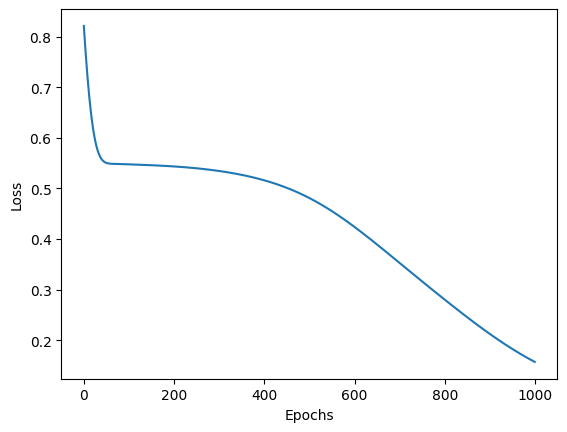

Training Losses are 
          0
0  0.601486
1  0.595796
2  0.590469
3  0.585505
4  0.580908
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3032   12]
 [  18  938]]
Accuracy: 0.9925, Precision: 0.9874, Recall: 0.9812, F1-score: 0.9843

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3031   13]
 [  15  941]]
Accuracy: 0.9930, Precision: 0.9864, Recall: 0.9843, F1-score: 0.9853



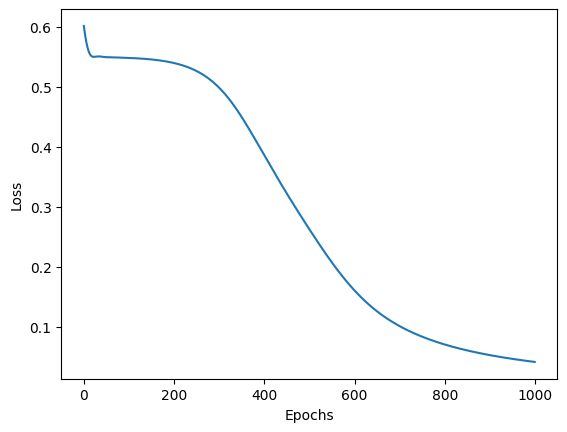

Training Losses are 
          0
0  0.586484
1  0.581742
2  0.577355
3  0.573325
4  0.569651
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3034   10]
 [  15  941]]
Accuracy: 0.9938, Precision: 0.9895, Recall: 0.9843, F1-score: 0.9869

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880



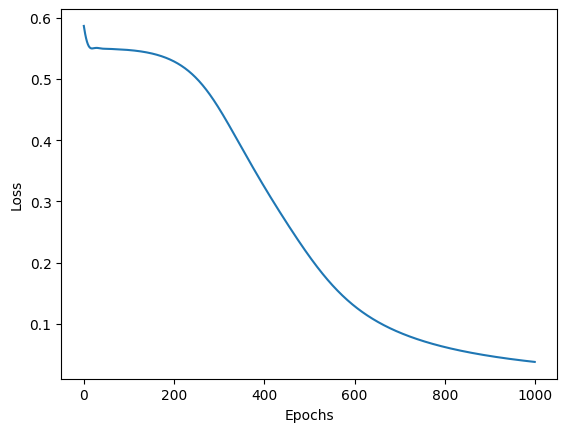

Training Losses are 
          0
0  0.694404
1  0.684909
2  0.675769
3  0.666990
4  0.658576
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3031   13]
 [  28  928]]
Accuracy: 0.9898, Precision: 0.9862, Recall: 0.9707, F1-score: 0.9784

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3029   15]
 [  19  937]]
Accuracy: 0.9915, Precision: 0.9842, Recall: 0.9801, F1-score: 0.9822



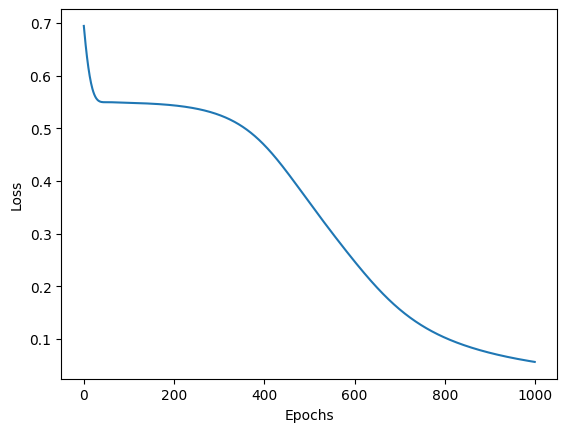

Training Losses are 
          0
0  0.698883
1  0.696974
2  0.695078
3  0.693195
4  0.691326
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3030   14]
 [ 393  563]]
Accuracy: 0.8982, Precision: 0.9757, Recall: 0.5889, F1-score: 0.7345

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3033   11]
 [ 390  566]]
Accuracy: 0.8998, Precision: 0.9809, Recall: 0.5921, F1-score: 0.7384



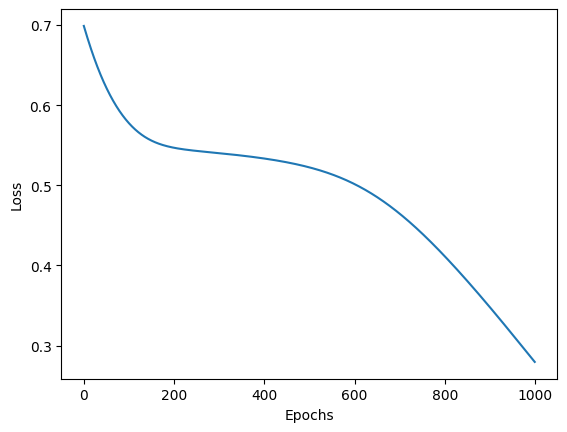

Training Losses are 
          0
0  0.588406
1  0.587325
2  0.586260
3  0.585210
4  0.584175
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3032   12]
 [  73  883]]
Accuracy: 0.9788, Precision: 0.9866, Recall: 0.9236, F1-score: 0.9541

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3034   10]
 [  55  901]]
Accuracy: 0.9838, Precision: 0.9890, Recall: 0.9425, F1-score: 0.9652



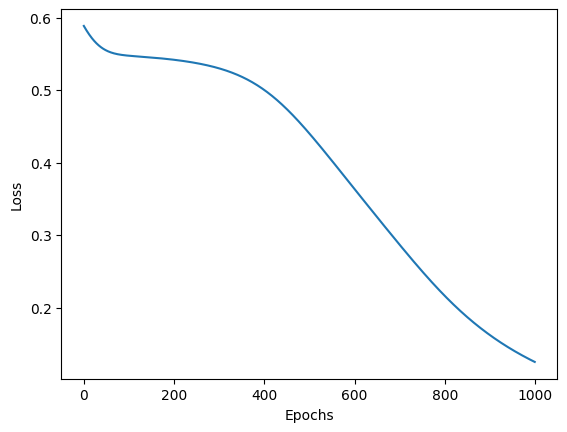

Training Losses are 
          0
0  0.610195
1  0.608691
2  0.607205
3  0.605737
4  0.604288
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3036    8]
 [ 115  841]]
Accuracy: 0.9692, Precision: 0.9906, Recall: 0.8797, F1-score: 0.9319

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3038    6]
 [ 103  853]]
Accuracy: 0.9728, Precision: 0.9930, Recall: 0.8923, F1-score: 0.9399



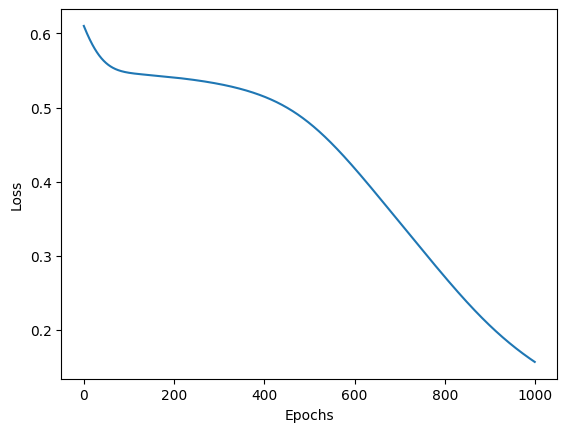

Training Losses are 
          0
0  0.803812
1  0.801357
2  0.798915
3  0.796485
4  0.794067
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3041    3]
 [ 635  321]]
Accuracy: 0.8405, Precision: 0.9907, Recall: 0.3358, F1-score: 0.5016

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3040    4]
 [ 641  315]]
Accuracy: 0.8387, Precision: 0.9875, Recall: 0.3295, F1-score: 0.4941



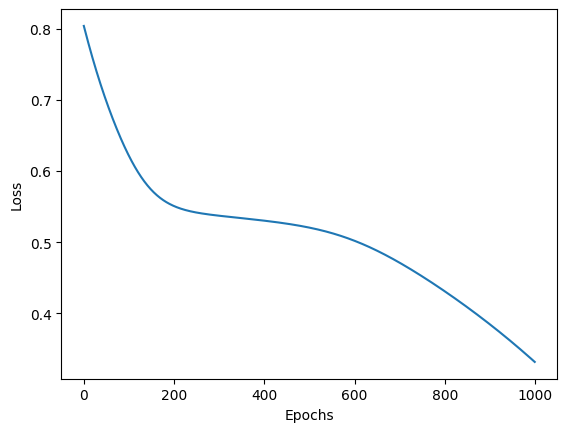

Training Losses are 
          0
0  0.904610
1  0.899013
2  0.893478
3  0.888005
4  0.882594
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3036    8]
 [ 662  294]]
Accuracy: 0.8325, Precision: 0.9735, Recall: 0.3075, F1-score: 0.4674

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3033   11]
 [ 678  278]]
Accuracy: 0.8277, Precision: 0.9619, Recall: 0.2908, F1-score: 0.4466



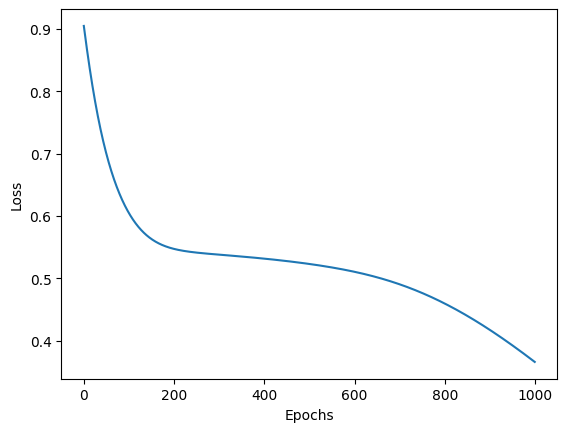

Training Losses are 
          0
0  0.743293
1  0.739521
2  0.735786
3  0.732087
4  0.728426
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3028   16]
 [ 142  814]]
Accuracy: 0.9605, Precision: 0.9807, Recall: 0.8515, F1-score: 0.9115

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3031   13]
 [ 152  804]]
Accuracy: 0.9587, Precision: 0.9841, Recall: 0.8410, F1-score: 0.9069



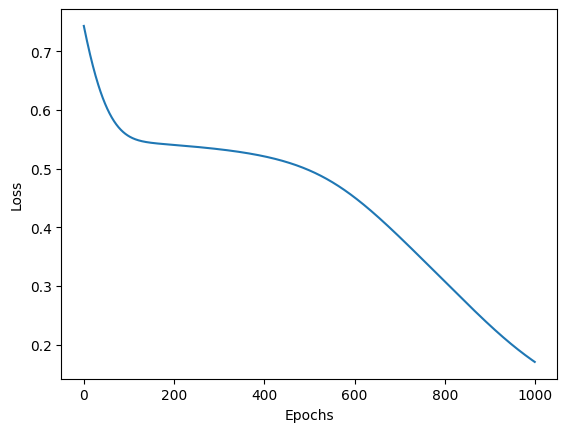

Training Losses are 
          0
0  0.765315
1  0.761655
2  0.758031
3  0.754442
4  0.750891
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3022   22]
 [ 394  562]]
Accuracy: 0.8960, Precision: 0.9623, Recall: 0.5879, F1-score: 0.7299

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3021   23]
 [ 394  562]]
Accuracy: 0.8958, Precision: 0.9607, Recall: 0.5879, F1-score: 0.7294



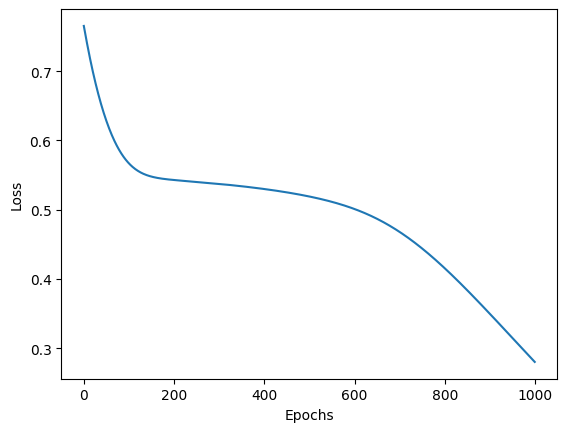

Training Losses are 
          0
0  0.676496
1  0.673199
2  0.669949
3  0.666746
4  0.663592
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3026   18]
 [ 176  780]]
Accuracy: 0.9515, Precision: 0.9774, Recall: 0.8159, F1-score: 0.8894

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3026   18]
 [ 191  765]]
Accuracy: 0.9477, Precision: 0.9770, Recall: 0.8002, F1-score: 0.8798



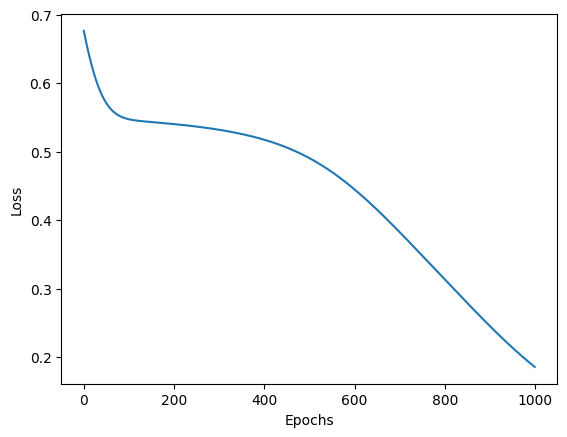

Training Losses are 
          0
0  0.668445
1  0.663151
2  0.657981
3  0.652937
4  0.648023
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3031   13]
 [  26  930]]
Accuracy: 0.9902, Precision: 0.9862, Recall: 0.9728, F1-score: 0.9795

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3031   13]
 [  16  940]]
Accuracy: 0.9928, Precision: 0.9864, Recall: 0.9833, F1-score: 0.9848



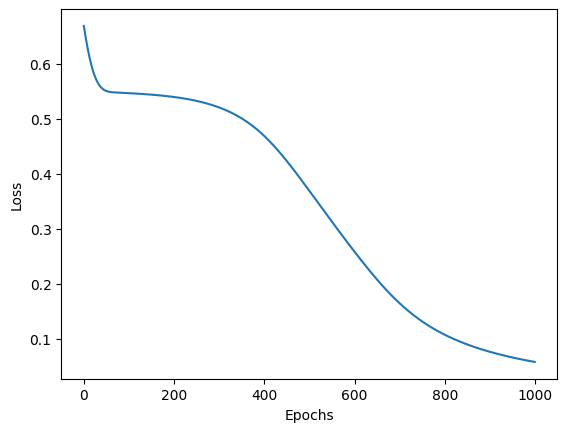

Training Losses are 
          0
0  0.617930
1  0.613873
2  0.609946
3  0.606153
4  0.602495
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3031   13]
 [  23  933]]
Accuracy: 0.9910, Precision: 0.9863, Recall: 0.9759, F1-score: 0.9811

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3032   12]
 [  16  940]]
Accuracy: 0.9930, Precision: 0.9874, Recall: 0.9833, F1-score: 0.9853



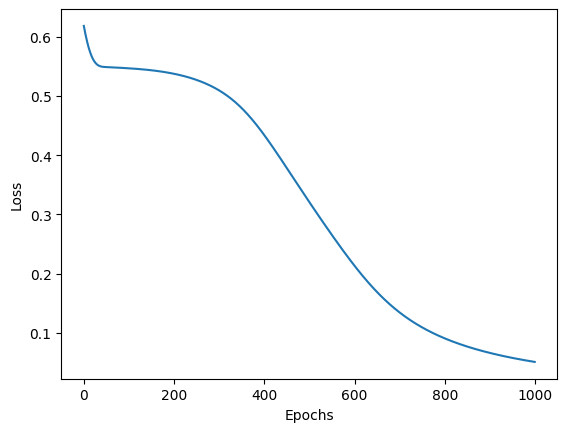

Training Losses are 
          0
0  0.669240
1  0.663713
2  0.658323
3  0.653072
4  0.647964
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3031   13]
 [  24  932]]
Accuracy: 0.9908, Precision: 0.9862, Recall: 0.9749, F1-score: 0.9805

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3031   13]
 [  16  940]]
Accuracy: 0.9928, Precision: 0.9864, Recall: 0.9833, F1-score: 0.9848



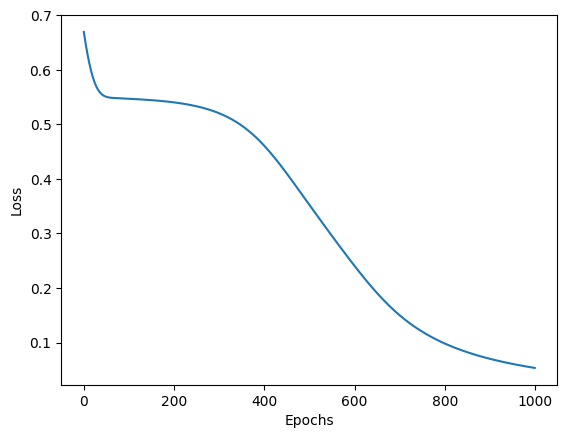

Training Losses are 
          0
0  0.653535
1  0.648688
2  0.643960
3  0.639352
4  0.634867
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3032   12]
 [  28  928]]
Accuracy: 0.9900, Precision: 0.9872, Recall: 0.9707, F1-score: 0.9789

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3031   13]
 [  20  936]]
Accuracy: 0.9918, Precision: 0.9863, Recall: 0.9791, F1-score: 0.9827



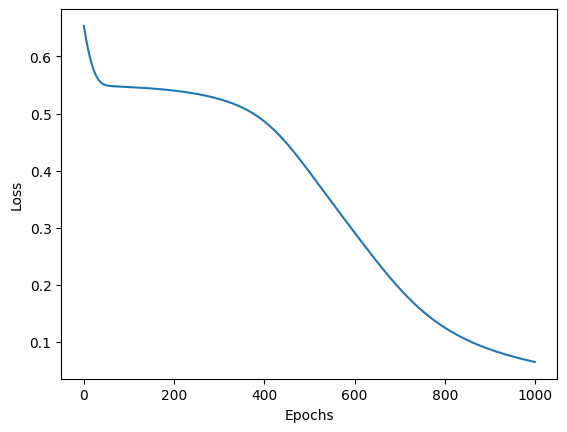

Training Losses are 
          0
0  0.792905
1  0.778755
2  0.765060
3  0.751828
4  0.739067
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3031   13]
 [  41  915]]
Accuracy: 0.9865, Precision: 0.9860, Recall: 0.9571, F1-score: 0.9713

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3031   13]
 [  33  923]]
Accuracy: 0.9885, Precision: 0.9861, Recall: 0.9655, F1-score: 0.9757



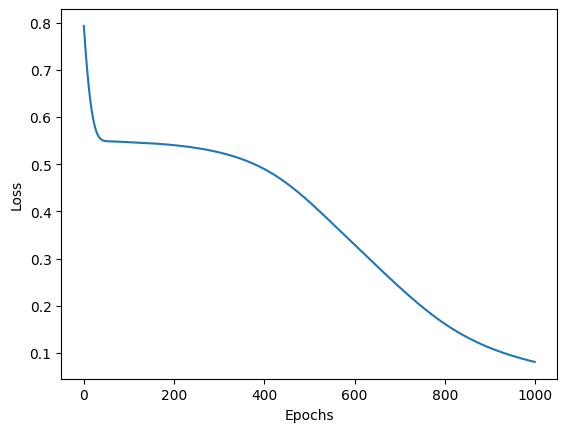

Training Losses are 
          0
0  0.665284
1  0.655730
2  0.646629
3  0.637984
4  0.629798
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3033   11]
 [  24  932]]
Accuracy: 0.9912, Precision: 0.9883, Recall: 0.9749, F1-score: 0.9816

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3034   10]
 [  17  939]]
Accuracy: 0.9932, Precision: 0.9895, Recall: 0.9822, F1-score: 0.9858



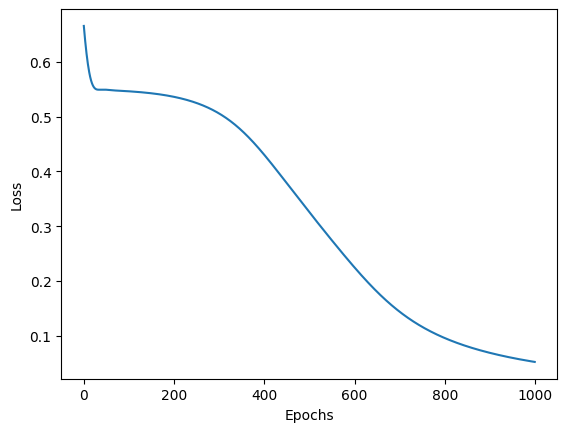

Training Losses are 
          0
0  0.732170
1  0.720163
2  0.708598
3  0.697483
4  0.686824
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3031   13]
 [  27  929]]
Accuracy: 0.9900, Precision: 0.9862, Recall: 0.9718, F1-score: 0.9789

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3030   14]
 [  20  936]]
Accuracy: 0.9915, Precision: 0.9853, Recall: 0.9791, F1-score: 0.9822



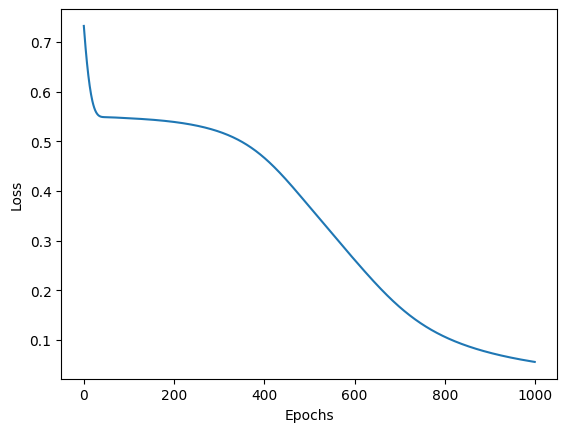

Training Losses are 
          0
0  0.697847
1  0.686613
2  0.675852
3  0.665569
4  0.655771
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3033   11]
 [  19  937]]
Accuracy: 0.9925, Precision: 0.9884, Recall: 0.9801, F1-score: 0.9842

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3033   11]
 [  16  940]]
Accuracy: 0.9932, Precision: 0.9884, Recall: 0.9833, F1-score: 0.9858



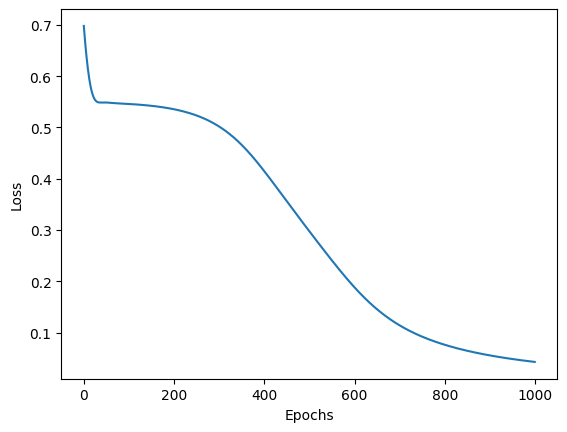

Training Losses are 
          0
0  0.799654
1  0.796154
2  0.792693
3  0.789270
4  0.785885
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3026   18]
 [ 385  571]]
Accuracy: 0.8992, Precision: 0.9694, Recall: 0.5973, F1-score: 0.7392

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3030   14]
 [ 389  567]]
Accuracy: 0.8992, Precision: 0.9759, Recall: 0.5931, F1-score: 0.7378



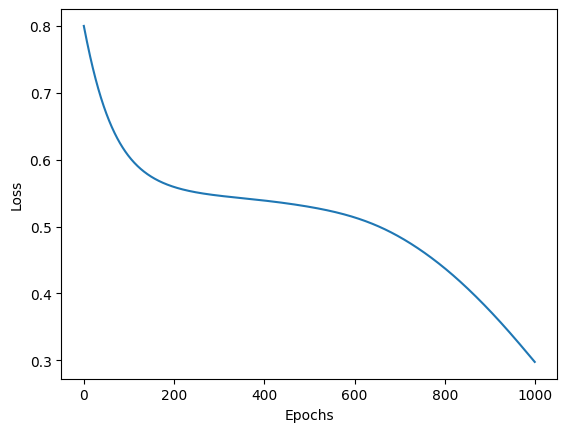

Training Losses are 
          0
0  0.639827
1  0.637479
2  0.635160
3  0.632872
4  0.630616
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3031   13]
 [  51  905]]
Accuracy: 0.9840, Precision: 0.9858, Recall: 0.9467, F1-score: 0.9658

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3033   11]
 [  39  917]]
Accuracy: 0.9875, Precision: 0.9881, Recall: 0.9592, F1-score: 0.9735



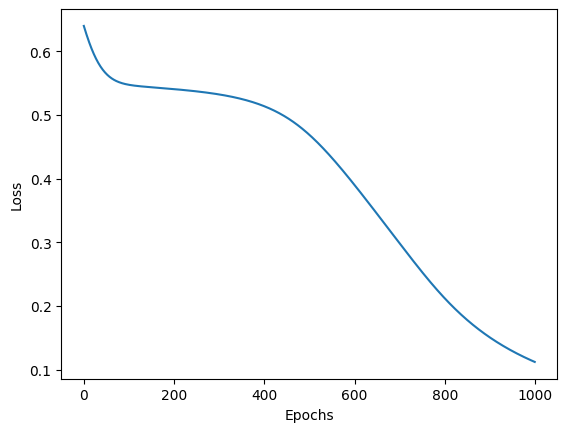

Training Losses are 
          0
0  0.657216
1  0.654118
2  0.651064
3  0.648055
4  0.645091
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3031   13]
 [  49  907]]
Accuracy: 0.9845, Precision: 0.9859, Recall: 0.9487, F1-score: 0.9670

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3031   13]
 [  41  915]]
Accuracy: 0.9865, Precision: 0.9860, Recall: 0.9571, F1-score: 0.9713



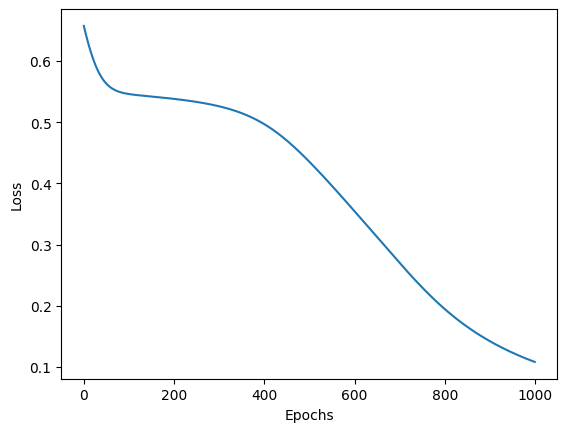

Training Losses are 
          0
0  0.846422
1  0.841762
2  0.837144
3  0.832569
4  0.828039
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3026   18]
 [ 483  473]]
Accuracy: 0.8748, Precision: 0.9633, Recall: 0.4948, F1-score: 0.6538

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3025   19]
 [ 482  474]]
Accuracy: 0.8748, Precision: 0.9615, Recall: 0.4958, F1-score: 0.6542



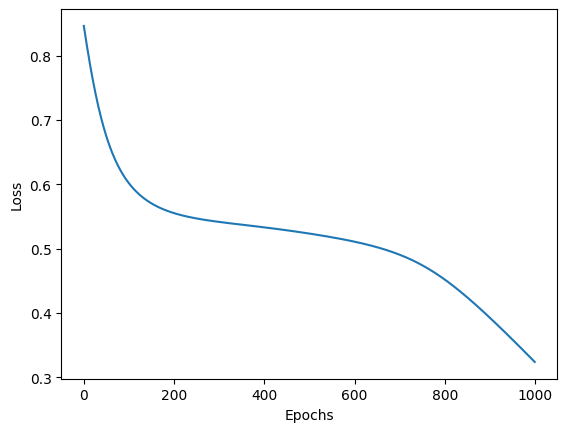

Training Losses are 
          0
0  0.566099
1  0.564529
2  0.563037
3  0.561624
4  0.560293
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3034   10]
 [  11  945]]
Accuracy: 0.9948, Precision: 0.9895, Recall: 0.9885, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3032   12]
 [   9  947]]
Accuracy: 0.9948, Precision: 0.9875, Recall: 0.9906, F1-score: 0.9890



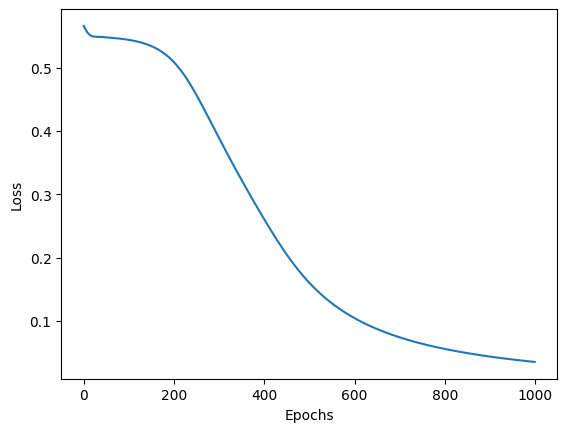

Training Losses are 
          0
0  0.813404
1  0.807200
2  0.801083
3  0.795056
4  0.789118
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3017   27]
 [ 272  684]]
Accuracy: 0.9253, Precision: 0.9620, Recall: 0.7155, F1-score: 0.8206

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3014   30]
 [ 257  699]]
Accuracy: 0.9283, Precision: 0.9588, Recall: 0.7312, F1-score: 0.8297



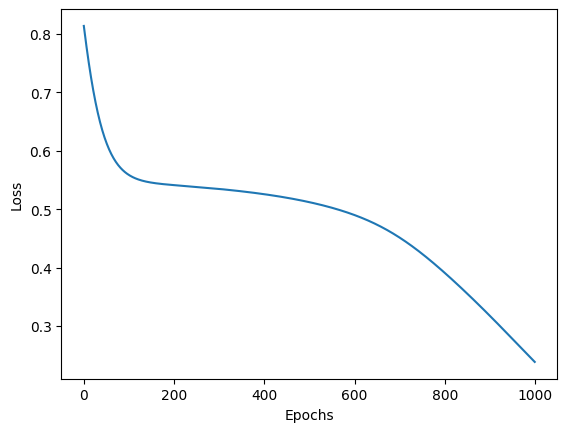

Training Losses are 
          0
0  0.661110
1  0.657104
2  0.653178
3  0.649334
4  0.645573
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3033   11]
 [  26  930]]
Accuracy: 0.9908, Precision: 0.9883, Recall: 0.9728, F1-score: 0.9805

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3033   11]
 [  20  936]]
Accuracy: 0.9922, Precision: 0.9884, Recall: 0.9791, F1-score: 0.9837



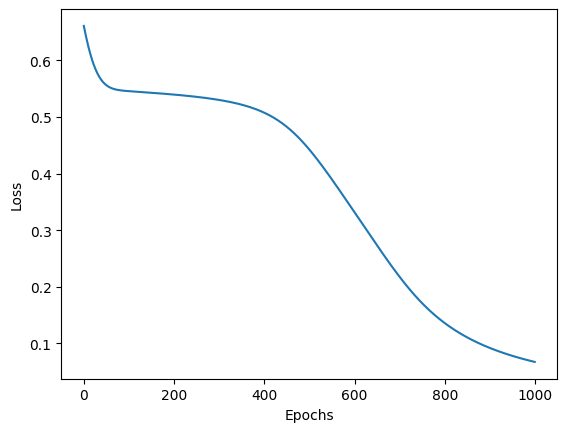

Training Losses are 
          0
0  0.761096
1  0.755694
2  0.750365
3  0.745109
4  0.739928
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3031   13]
 [  42  914]]
Accuracy: 0.9862, Precision: 0.9860, Recall: 0.9561, F1-score: 0.9708

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3031   13]
 [  33  923]]
Accuracy: 0.9885, Precision: 0.9861, Recall: 0.9655, F1-score: 0.9757



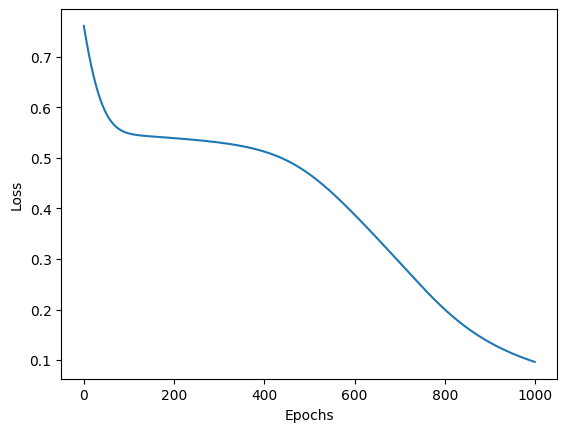

Training Losses are 
          0
0  0.638966
1  0.633669
2  0.628543
3  0.623587
4  0.618802
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3034   10]
 [  11  945]]
Accuracy: 0.9948, Precision: 0.9895, Recall: 0.9885, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3033   11]
 [   9  947]]
Accuracy: 0.9950, Precision: 0.9885, Recall: 0.9906, F1-score: 0.9896



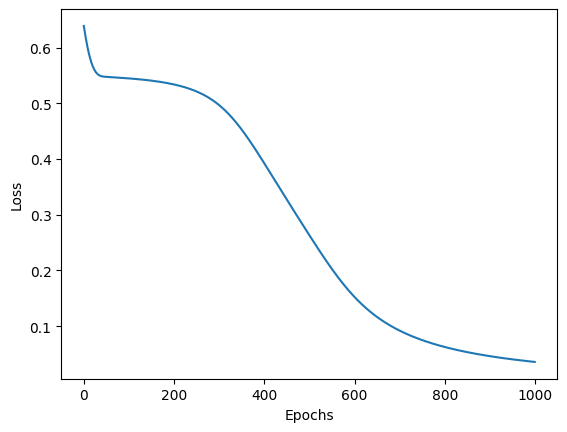

Training Losses are 
          0
0  0.593485
1  0.589734
2  0.586159
3  0.582762
4  0.579545
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3036    8]
 [  10  946]]
Accuracy: 0.9955, Precision: 0.9916, Recall: 0.9895, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3036    8]
 [   8  948]]
Accuracy: 0.9960, Precision: 0.9916, Recall: 0.9916, F1-score: 0.9916



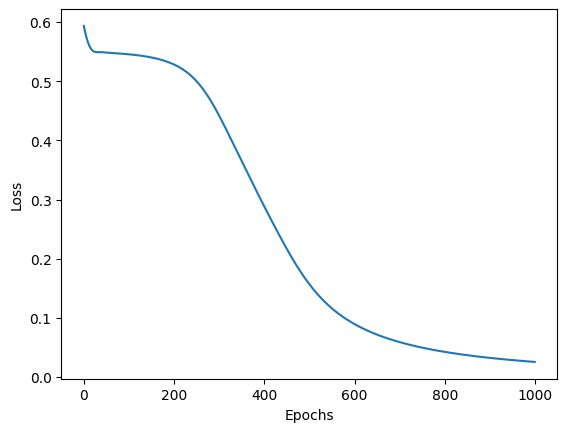

Training Losses are 
          0
0  0.707079
1  0.699791
2  0.692690
3  0.685779
4  0.679060
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3033   11]
 [  20  936]]
Accuracy: 0.9922, Precision: 0.9884, Recall: 0.9791, F1-score: 0.9837

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3032   12]
 [  16  940]]
Accuracy: 0.9930, Precision: 0.9874, Recall: 0.9833, F1-score: 0.9853



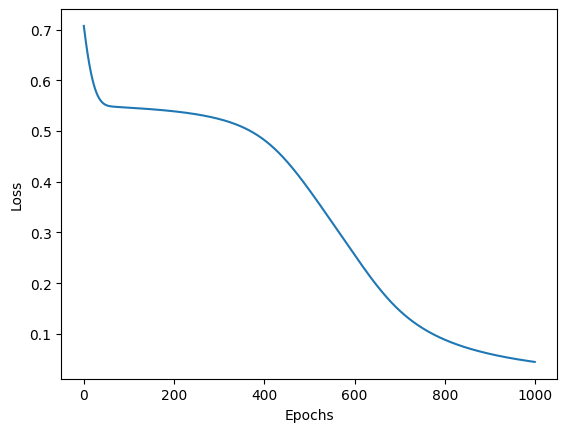

Training Losses are 
          0
0  0.865829
1  0.855104
2  0.844588
3  0.834287
4  0.824202
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3029   15]
 [  79  877]]
Accuracy: 0.9765, Precision: 0.9832, Recall: 0.9174, F1-score: 0.9491

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3030   14]
 [  70  886]]
Accuracy: 0.9790, Precision: 0.9844, Recall: 0.9268, F1-score: 0.9547



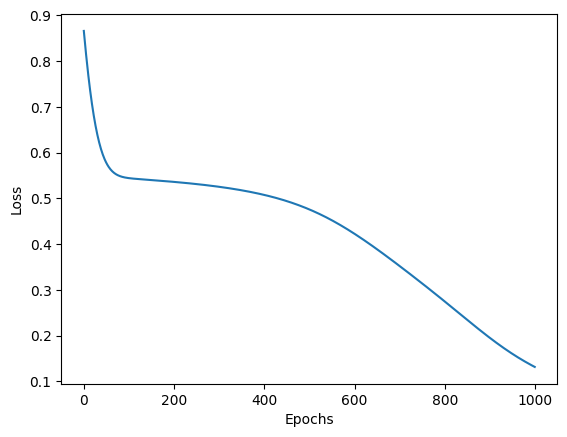

Training Losses are 
          0
0  0.783838
1  0.767102
2  0.751030
3  0.735632
4  0.720916
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3033   11]
 [  16  940]]
Accuracy: 0.9932, Precision: 0.9884, Recall: 0.9833, F1-score: 0.9858

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3032   12]
 [  14  942]]
Accuracy: 0.9935, Precision: 0.9874, Recall: 0.9854, F1-score: 0.9864



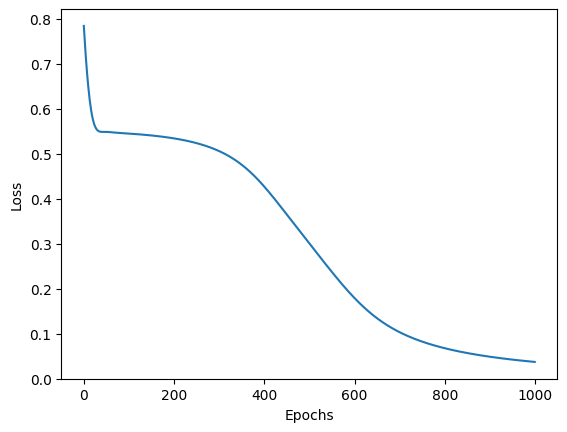

Training Losses are 
          0
0  0.734593
1  0.720306
2  0.706645
3  0.693623
4  0.681244
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3034   10]
 [  13  943]]
Accuracy: 0.9942, Precision: 0.9895, Recall: 0.9864, F1-score: 0.9880

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3032   12]
 [   9  947]]
Accuracy: 0.9948, Precision: 0.9875, Recall: 0.9906, F1-score: 0.9890



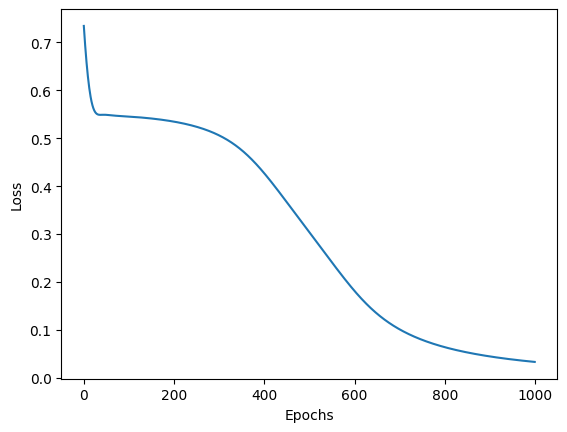

Training Losses are 
          0
0  0.810372
1  0.794063
2  0.778325
3  0.763168
4  0.748600
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3033   11]
 [  21  935]]
Accuracy: 0.9920, Precision: 0.9884, Recall: 0.9780, F1-score: 0.9832

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3032   12]
 [  16  940]]
Accuracy: 0.9930, Precision: 0.9874, Recall: 0.9833, F1-score: 0.9853



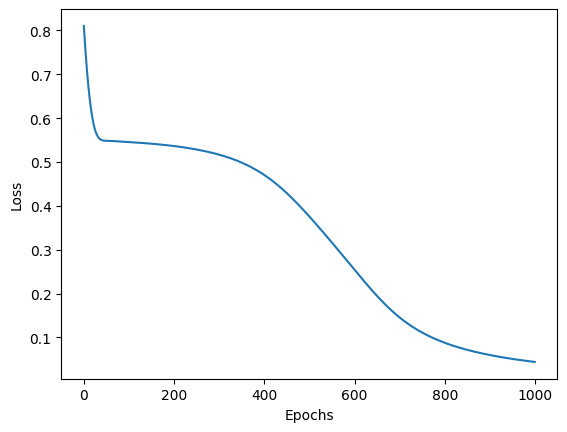

Training Losses are 
          0
0  0.594908
1  0.588215
2  0.582106
3  0.576580
4  0.571634
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



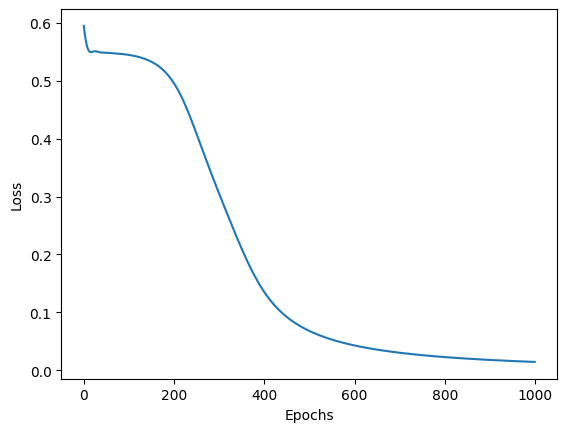

Training Losses are 
          0
0  0.594891
1  0.592106
2  0.589402
3  0.586782
4  0.584251
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3034   10]
 [  12  944]]
Accuracy: 0.9945, Precision: 0.9895, Recall: 0.9874, F1-score: 0.9885

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3034   10]
 [   9  947]]
Accuracy: 0.9952, Precision: 0.9896, Recall: 0.9906, F1-score: 0.9901



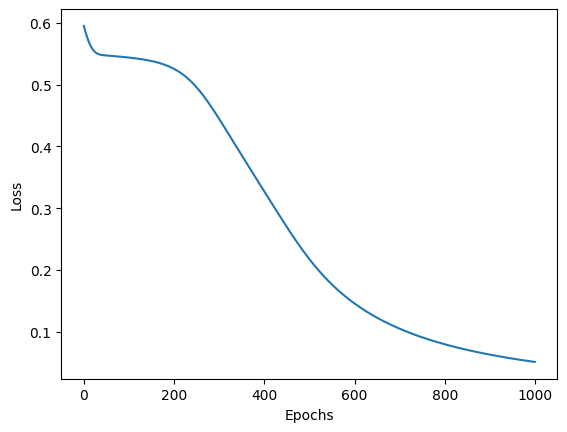

Training Losses are 
          0
0  0.568827
1  0.567493
2  0.566201
3  0.564954
4  0.563752
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3038    6]
 [  12  944]]
Accuracy: 0.9955, Precision: 0.9937, Recall: 0.9874, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3037    7]
 [   9  947]]
Accuracy: 0.9960, Precision: 0.9927, Recall: 0.9906, F1-score: 0.9916



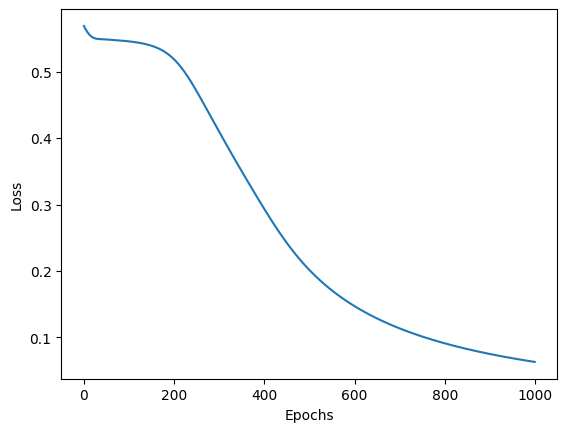

Training Losses are 
          0
0  0.777021
1  0.771451
2  0.765945
3  0.760506
4  0.755138
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3031   13]
 [  53  903]]
Accuracy: 0.9835, Precision: 0.9858, Recall: 0.9446, F1-score: 0.9647

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3031   13]
 [  41  915]]
Accuracy: 0.9865, Precision: 0.9860, Recall: 0.9571, F1-score: 0.9713



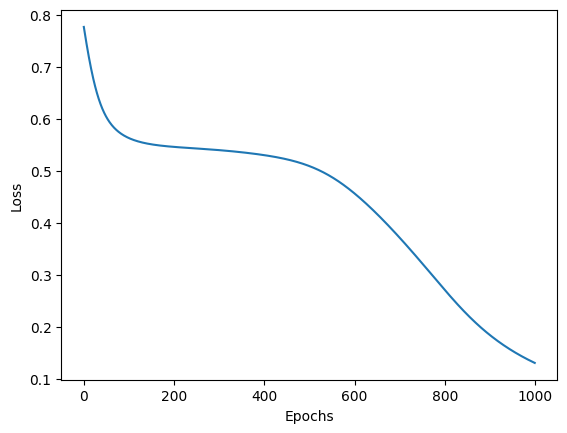

Training Losses are 
          0
0  0.713482
1  0.708560
2  0.703726
3  0.698982
4  0.694334
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3033   11]
 [  31  925]]
Accuracy: 0.9895, Precision: 0.9882, Recall: 0.9676, F1-score: 0.9778

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3033   11]
 [  25  931]]
Accuracy: 0.9910, Precision: 0.9883, Recall: 0.9738, F1-score: 0.9810



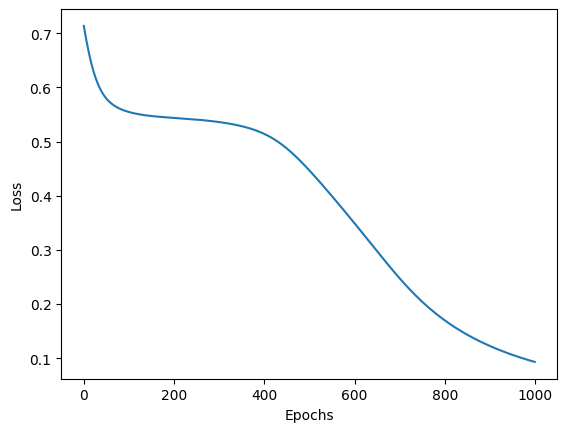

Training Losses are 
          0
0  0.590929
1  0.587450
2  0.584128
3  0.580967
4  0.577970
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927



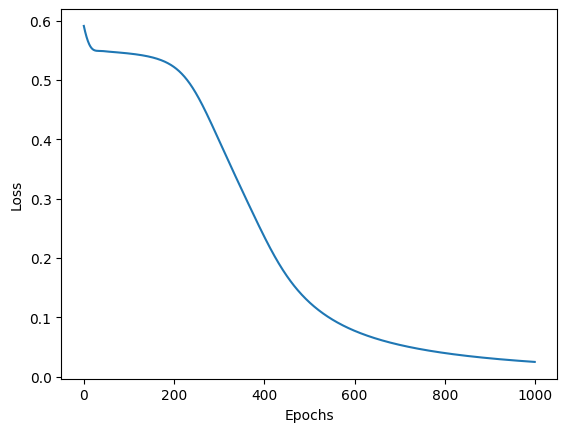

Training Losses are 
          0
0  0.603831
1  0.600345
2  0.596966
3  0.593699
4  0.590547
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3034   10]
 [   9  947]]
Accuracy: 0.9952, Precision: 0.9896, Recall: 0.9906, F1-score: 0.9901



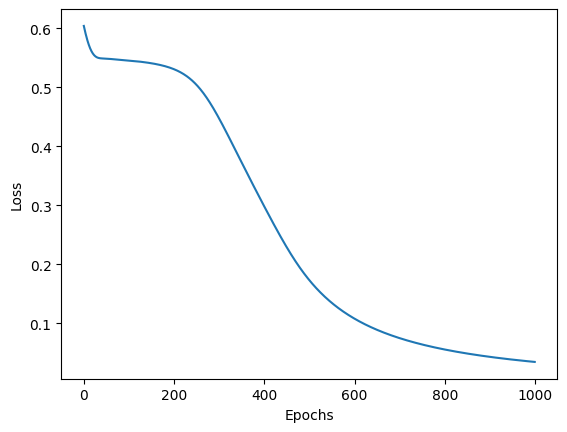

Training Losses are 
          0
0  0.784823
1  0.776314
2  0.768005
3  0.759899
4  0.752000
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3032   12]
 [  26  930]]
Accuracy: 0.9905, Precision: 0.9873, Recall: 0.9728, F1-score: 0.9800

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3030   14]
 [  20  936]]
Accuracy: 0.9915, Precision: 0.9853, Recall: 0.9791, F1-score: 0.9822



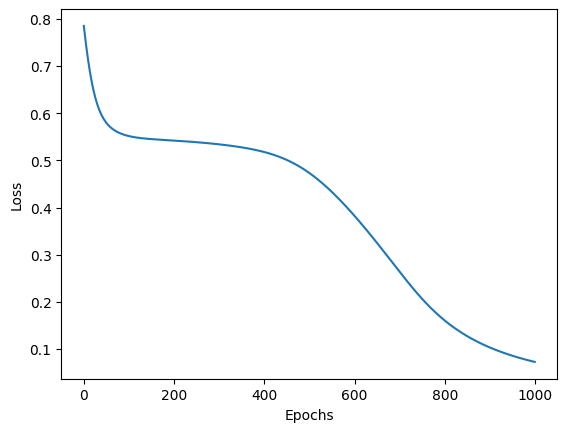

Training Losses are 
          0
0  0.836948
1  0.828115
2  0.819448
3  0.810951
4  0.802628
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3031   13]
 [  40  916]]
Accuracy: 0.9868, Precision: 0.9860, Recall: 0.9582, F1-score: 0.9719

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3030   14]
 [  33  923]]
Accuracy: 0.9882, Precision: 0.9851, Recall: 0.9655, F1-score: 0.9752



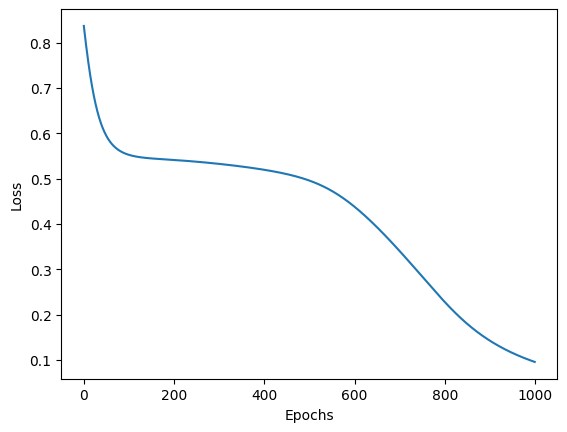

Training Losses are 
          0
0  0.654309
1  0.645018
2  0.636173
3  0.627784
4  0.619859
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3037    7]
 [   9  947]]
Accuracy: 0.9960, Precision: 0.9927, Recall: 0.9906, F1-score: 0.9916

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3035    9]
 [   7  949]]
Accuracy: 0.9960, Precision: 0.9906, Recall: 0.9927, F1-score: 0.9916



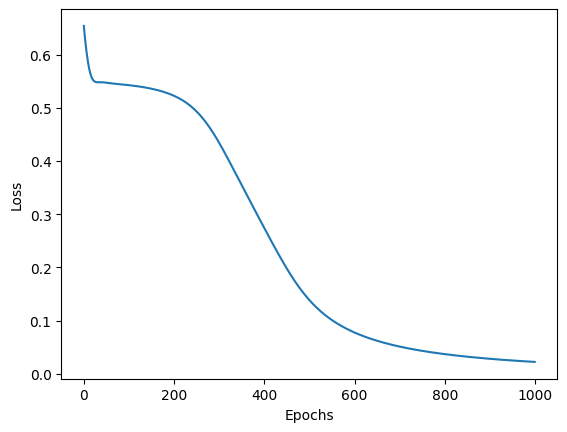

Training Losses are 
          0
0  0.640653
1  0.632747
2  0.625228
3  0.618102
4  0.611374
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3037    7]
 [   6  950]]
Accuracy: 0.9968, Precision: 0.9927, Recall: 0.9937, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



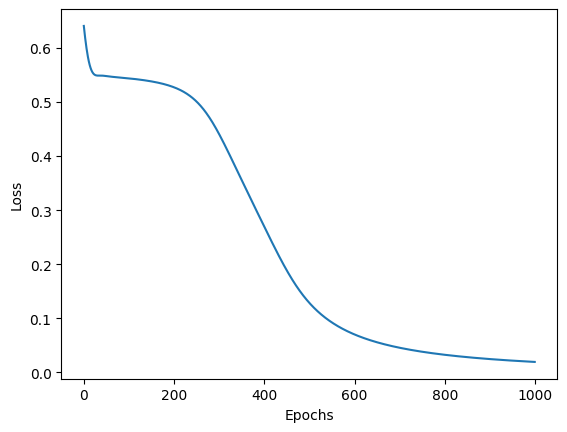

Training Losses are 
          0
0  0.700276
1  0.689551
2  0.679238
3  0.669348
4  0.659888
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3032   12]
 [   9  947]]
Accuracy: 0.9948, Precision: 0.9875, Recall: 0.9906, F1-score: 0.9890



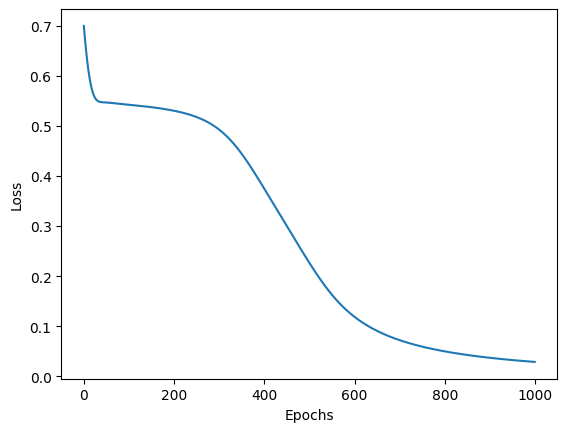

Training Losses are 
          0
0  0.630786
1  0.623293
2  0.616192
3  0.609488
4  0.603184
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3040    4]
 [   7  949]]
Accuracy: 0.9972, Precision: 0.9958, Recall: 0.9927, F1-score: 0.9942



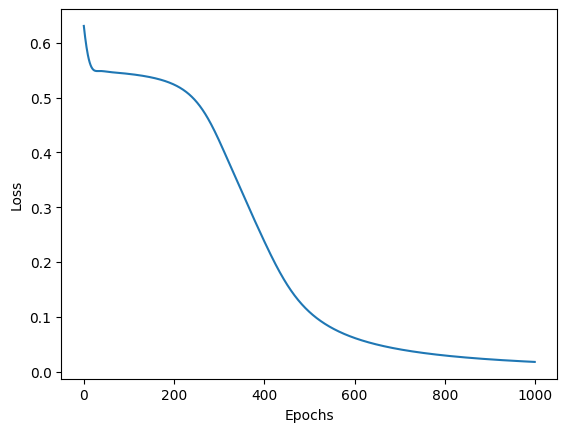

In [ ]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(26,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [ ]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(26,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()